In [1]:
# IMPORT SECTION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Read the file and rename variables

df = pd.read_csv ('data.csv',sep=";")
df = df.rename(columns={'Horodateur': 'Horodateur', 'Etes-vous :': 'sex', 'Quel âge avez-vous ? (Juste mettre le nombre)': 'age',
                       'De quelle province venez-vous ?': 'Province', 'Habitez-vous :':'livingPlace',
                       'Quel est votre code postal ?': 'zipCode', 
                       'En moyenne, combien de kilomètres effectuez-vous en voiture sur une année ?  [Avant la Covid-19]': "kmYear_beforeCovid",
                       'En moyenne, combien de kilomètres effectuez-vous en voiture sur une année ?  [Après la Covid-19]': "kmYear_afterCovid",
                       'Depuis la Covid-19, vos déplacements en voiture': 'BeforeAfterCovid', "Quel est votre plus haut niveau d'étude ?": 'studyYear',
                       'Vous êtes :': 'Profession', "Travaillez-vous dans le secteur de l'énergie et/ou dans le domaine de l'environnement ?": 'environment_Know',
                        'Comment décririez-vous le revenu actuel de votre ménage ?': 'revenu', 'Avez-vous déjà rencontré un des problèmes suivants : [Inondation]': 'had_Inondation', 
                        'Avez-vous déjà rencontré un des problèmes suivants : [Incendie]' : 'had_Fire',
                        'Avez-vous déjà rencontré un des problèmes suivants : [Pollution]': 'had_Pollution',
                        "Avant de participer à cette enquête, aviez-vous déjà entendu parler de l'utilisation de l'hydrogène dans le contexte de la production d'énergie ?": 'H2_Know',
                        "Evaluez votre connaissance à ce propos": "know_Evaluation",
                        "Que pensez-vous de l'utilisation de l'hydrogène comme solution possible aux défis énergétiques et environnementaux ?": 'h2_VS_envi',
                        "Avez-vous déjà pensé à acheter une voiture à hydrogène ? ": 'carH2_idea',
                        "Comparées aux voitures à hydrogène, je pense que [Les voitures conventionnelles sont]": "conventional_car",
                        "Comparées aux voitures à hydrogène, je pense que [Les voitures hybrides sont]" : "hybrides_car",
                        "Comparées aux voitures à hydrogène, je pense que [Les voitures électriques sont]": "electric_car",
                        "Comparées aux voitures à hydrogène, je pense que [Les voitures au gaz naturel comprimé (GNC) ou au gaz naturel liquéfié (GNL) sont]":'gaz_car', 
                        " [Etre mieux informé.e sur ce sujet]": 'subject_know',
                        " [Pouvoir contribuer à l'élaboration des lois associées]": 'law_elaboration',
                        " [Prix d'achat de la voiture à hydrogène]": "h2_purchasePrice",
                        " [Prix de l'hydrogène]": "h2_price",
                        " [Prix des autres carburants]": 'otherfuel_price',
                        " [Sécurité de l'hydrogène]": 'h2_security',
                        " [La présence de stations à hydrogène]": "h2_station",
                        " [Autonomie]":"h2_automony",
                        " [Diminution des importations de combustibles]":"dimImportation",
                        " [Réduction des émissions de gaz à effet de serre à l'origine du changement climatique]":"gazReduction",
                        " [Réduction de la pollution atmosphérique locale dans les zones urbaines]":"atmos_reduction_urban",
                        " [Création d'opportunités pour les industries belges afin d'accroître leur capacité à fournir des technologies innovantes]":"Belgium_company",
                        'A quel degré seriez-vous intéressé.e par l\'achat d\'une voiture à hydrogène si ... (sur une échelle de "Pas du tout intéressé.e" à "Fortement intéressé.e") [tout est égal (prix, confort, maintenance,..) aux autres sortes de voiture]': 'everything_equal',
                        'A quel degré seriez-vous intéressé.e par l\'achat d\'une voiture à hydrogène si ... (sur une échelle de "Pas du tout intéressé.e" à "Fortement intéressé.e") [des subsides sont fournis à l\'achat]':'subside',
                        'A quel degré seriez-vous intéressé.e par l\'achat d\'une voiture à hydrogène si ... (sur une échelle de "Pas du tout intéressé.e" à "Fortement intéressé.e") [les voitures à diesel sont bannies des villes]':'diesel_no_in_town',
                        'A quel degré seriez-vous intéressé.e par l\'achat d\'une voiture à hydrogène si ... (sur une échelle de "Pas du tout intéressé.e" à "Fortement intéressé.e") [les voitures à essence sont bannies des villes]':'essence_no_in_town',
                        'Si une limitation de kilomètres par an pouvant être réalisés par des voitures polluantes (diesel/essence) existait, à quelle limitation passeriez-vous à une voiture plus propre ? ': 'km_limitation'
                        })

df = df.drop(columns=['Horodateur'])
df.to_csv('out.csv', index=False)
len_df = len(df['subject_know'])
df

,sex,age,Province,livingPlace,zipCode,kmYear_beforeCovid,kmYear_afterCovid,BeforeAfterCovid,studyYear,Profession,...,h2_automony,dimImportation,gazReduction,atmos_reduction_urban,Belgium_company,everything_equal,subside,diesel_no_in_town,essence_no_in_town,km_limitation
0,Homme,24,Liège,En périphérie,4860,Entre 10 000 et 15 000,Entre 10 000 et 15 000,sont restés stables,Master,Etudiant,...,Fort important,Moyennement important,Fort important,Très important,Peu important,Un peu intéressé.e,Un peu intéressé.e,Fortement intéressé.e,Fortement intéressé.e,5 000 km
1,Femme,23,Liège,En périphérie,4420,Entre 10 000 et 15 000,Entre 10 000 et 15 000,sont restés stables,Master,Employé,...,Très important,Fort important,Fort important,Fort important,Moyennement important,Fortement intéressé.e,Fortement intéressé.e,Moyennement intéressé.e,Fortement intéressé.e,5 000 km
2,Femme,24,Liège,En périphérie,4540,Plus de 20 000,Entre 15 000 et 20 000,Ont diminué,Bachelier,Employé,...,Fort important,Fort important,Fort important,Fort important,Fort important,Fortement intéressé.e,Un peu intéressé.e,Moyennement intéressé.e,Moyennement intéressé.e,10 000 km
3,Homme,18,Liège,A la campagne,4700,Moins de 10 000,Moins de 10 000,sont restés stables,Bachelier,Etudiant,...,Moyennement important,Très important,Très important,Très important,Très important,Un peu intéressé.e,Fortement intéressé.e,Un peu intéressé.e,Un peu intéressé.e,20 000 km
4,Homme,24,Liège,A la campagne,4550,Plus de 20 000,Plus de 20 000,sont restés stables,Bachelier,Employé,...,Très important,Très important,Très important,Très important,Très important,Fortement intéressé.e,Fortement intéressé.e,Moyennement intéressé.e,Fortement intéressé.e,20 000 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Homme,57,Luxembourg,A la campagne,6769,Plus de 20 000,Plus de 20 000,sont restés stables,Master,Indépendant,...,Moyennement important,Très important,Très important,Très important,Très important,Fortement intéressé.e,Fortement intéressé.e,Fortement intéressé.e,Fortement intéressé.e,1 000 km
317,Femme,36,Namur,En centre ville,1340,Moins de 10 000,Moins de 10 000,sont restés stables,Master,Etudiant,...,Fort important,Moyennement important,Très important,Très important,Fort important,Peu intéressé.e,Peu intéressé.e,Moyennement intéressé.e,Moyennement intéressé.e,1 000 km
318,Homme,53,Namur,A la campagne,5020,Entre 15 000 et 20 000,Plus de 20 000,Ont augmenté,Master,Indépendant,...,Très important,Très important,Très important,Très important,Très important,Fortement intéressé.e,Fortement intéressé.e,Pas du tout intéressé.e,Fortement intéressé.e,20 000 km
319,Homme,74,Namur,A la campagne,5640,Plus de 20 000,Entre 15 000 et 20 000,sont restés stables,Pilote de ligne,Retraité,...,Moyennement important,Moyennement important,Pas du tout important,Pas du tout important,Moyennement important,Un peu intéressé.e,Fortement intéressé.e,Fortement intéressé.e,Fortement intéressé.e,20 000 km


In [3]:
# Classify age

for i in range(len_df):
    if df['age'][i] <= 25: # Youngs
        df['age'][i] = 0
    elif ((df['age'][i] > 25) and (df['age'][i] <= 65)): # Adults
        df['age'][i] = 1
    else :
        df['age'][i] = 2 # seniors 

<ipython-input-3-0c2b69aa21f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i] = 0
<ipython-input-3-0c2b69aa21f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i] = 1
<ipython-input-3-0c2b69aa21f2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i] = 2 # seniors


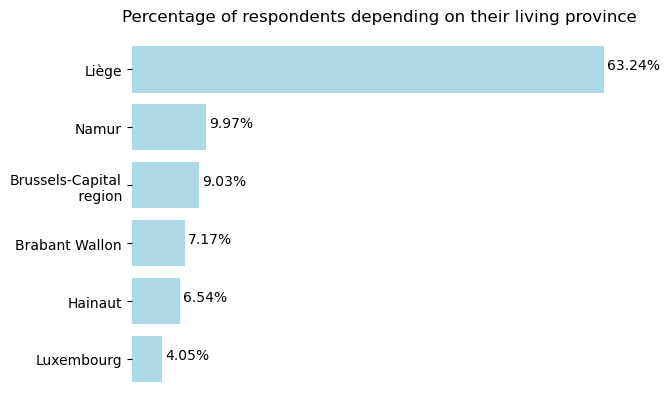

In [5]:
# Analysis provinces

tot = 0
k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0
k6 = 0


for i in range(len(df['Province'])) : 
    tot += 1
    if df['Province'][i] == 'Brabant Wallon':
        k6 += 1
    elif df['Province'][i] == 'Hainaut':
        k5 += 1
    elif df['Province'][i] == 'Liège':
        k4 += 1
    elif df['Province'][i] == 'Luxembourg':
        k3 += 1
    elif df['Province'][i] == 'Namur':
        k2 += 1
    else : 
        k1 += 1
            
av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100
av_k4 = (k4/len_df)*100
av_k5 = (k5/len_df)*100
av_k6 = (k6/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

province = ['Liège', 'Namur','Brussels-Capital\n region','Brabant Wallon','Hainaut', 'Luxembourg']
y_pos = np.arange(len(province))
percentage = [av_k4,av_k2,av_k1, av_k6,av_k5,av_k3]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(province)
ax.invert_yaxis()
ax.set_title('Percentage of respondents depending on their living province')
fig.patch.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])

for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

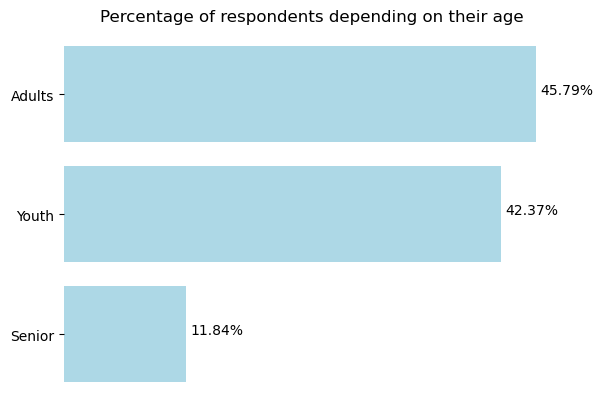

In [6]:
# Analysis age categories

k1 = 0
k2 = 0
k3 = 0

for i in range(len_df) : 
    if df['age'][i] == 0:
        k1 += 1
    elif df['age'][i] == 1:
        k2 += 1
    elif df['age'][i] == 2:
        k3 += 1
        
av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

age = ['Adults', 'Youth', 'Senior']
y_pos = np.arange(len(age))

percentage = [av_k2,av_k1,av_k3]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(age)
ax.invert_yaxis() 
ax.set_title('Percentage of respondents depending on their age')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

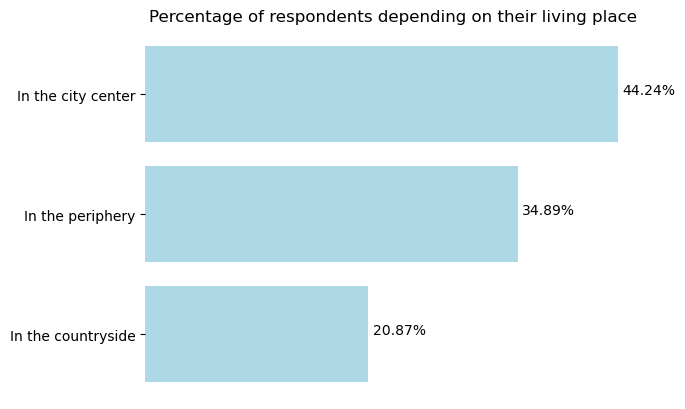

In [7]:
# Analysis of the living place

k1 = 0
k2 = 0
k3 = 0

for i in range(len_df) : 
    if df['livingPlace'][i] == 'En centre ville':
        k1 += 1
    elif df['livingPlace'][i] == 'En périphérie':
        k2 += 1
    elif df['livingPlace'][i] == 'A la campagne':
        k3 += 1
            
av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['In the city center', 'In the periphery', 'In the countryside']
y_pos = np.arange(len(x_subjects))

percentage = [av_k3,av_k2,av_k1]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis() 
ax.set_title('Percentage of respondents depending on their living place')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

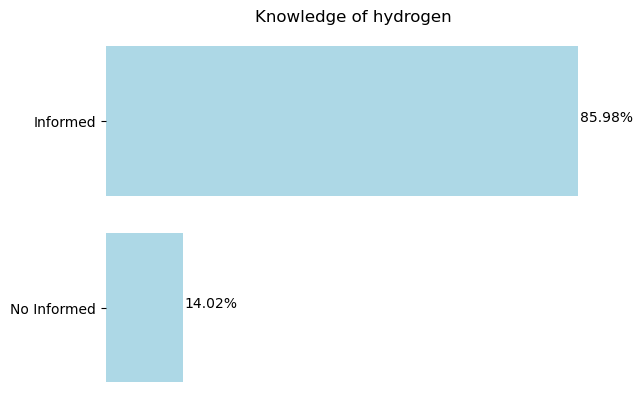

In [7]:
# Knowledge of hydrogen fuel cells
yes = 0
no = 0

for i in range(len_df) : 
    if df['H2_Know'][i] == 'Oui':
        yes += 1
    else : 
        no += 1
 
colors = ['lightblue', 'lightpink']

per_yes = (yes/len_df)*100
per_no = (no/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Informed', 'No Informed']
y_pos = np.arange(len(x_subjects))

percentage = [per_yes,per_no]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis() 
ax.set_title('Knowledge of hydrogen')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

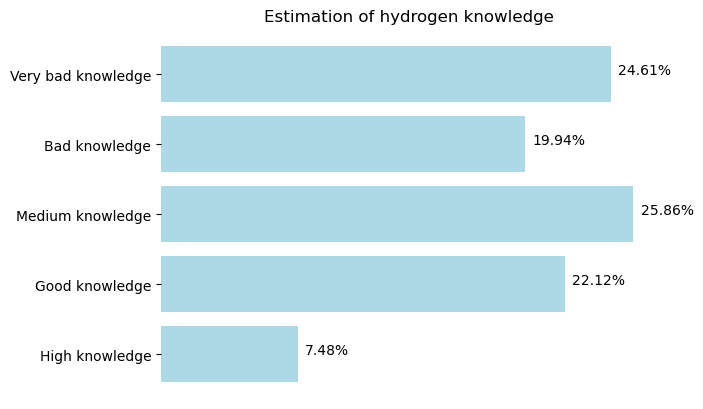

In [8]:
# Estimation of hydrogen fuel cells knowledge for informed poeple

k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0

for i in range(len_df) :
            if df['know_Evaluation'][i] == 5:
                k5 += 1
            elif df['know_Evaluation'][i] == 4:
                k4 += 1
            elif df['know_Evaluation'][i] == 3:
                k3 += 1
            elif df['know_Evaluation'][i] == 2:
                k2 += 1
            else : 
                k1 += 1

            
av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100
av_k4 = (k4/len_df)*100
av_k5 = (k5/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Very bad knowledge', 'Bad knowledge', 'Medium knowledge', 'Good knowledge', 'High knowledge']
y_pos = np.arange(len(x_subjects))

percentage = [av_k1,av_k2,av_k3,av_k4,av_k5]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()  
ax.set_title('Estimation of hydrogen knowledge')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

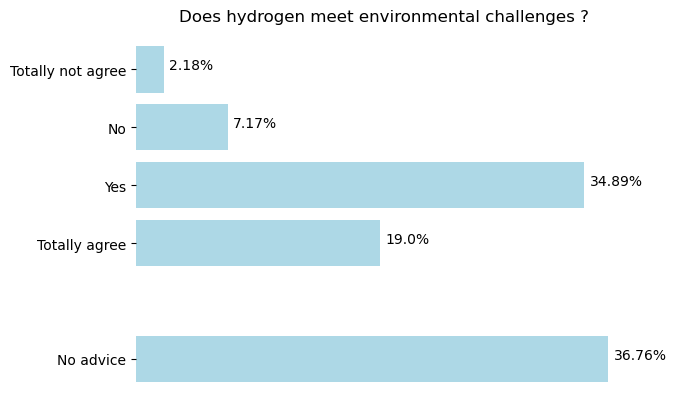

In [9]:
# Does hydrogen meet environmental challenges?

k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0


for i in range(len_df) : 
    if df['h2_VS_envi'][i] == 5:
        k5 += 1
    elif df['h2_VS_envi'][i] == 4:
        k4 += 1
    elif df['h2_VS_envi'][i] == 3:
        k3 += 1
    elif df['h2_VS_envi'][i] == 2:
        k2 += 1
    else : 
        k1 += 1
        
av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100
av_k4 = (k4/len_df)*100
av_k5 = (k5/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Totally not agree', 'No', 'Yes', 'Totally agree', 'No advice'] 
y_pos = [0,1,2,3,5]

percentage = [av_k1,av_k2,av_k4,av_k5, av_k3] 

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis() 
ax.set_title('Does hydrogen meet environmental challenges ?')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    if (i<len(percentage)-1) :
        plt.text(percentage[i] + 0.4, i, str(round(percentage[i], 2))+'%')
    else :
        plt.text(percentage[i] + 0.4, i+1, str(round(percentage[i], 2))+'%') 

plt.show()

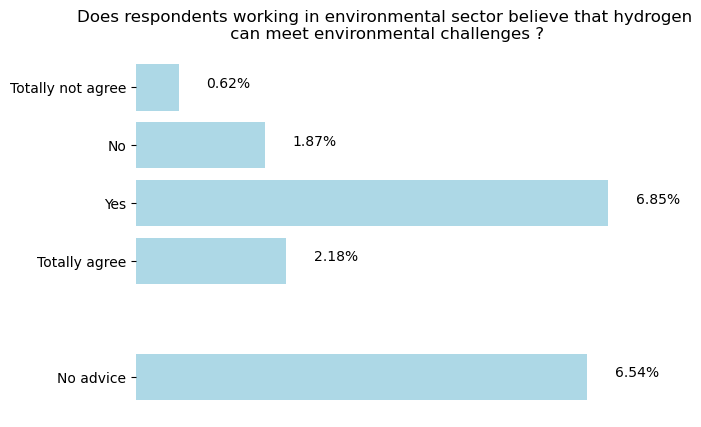

In [10]:
# Does poeple working in environmental sector beleive that hydrogen can meet environmental challenges ?

k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0

for i in range(len_df) : 
    if df['environment_Know'][i] == 'Oui' : 
        if df['h2_VS_envi'][i] == 5:
            k5 += 1
        elif df['h2_VS_envi'][i] == 4:
            k4 += 1
        elif df['h2_VS_envi'][i] == 3:
            k3 += 1
        elif df['h2_VS_envi'][i] == 2:
            k2 += 1
        else : 
            k1 += 1
            
av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100
av_k4 = (k4/len_df)*100
av_k5 = (k5/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Totally not agree', 'No', 'Yes', 'Totally agree', 'No advice'] 
y_pos = [0,1,2,3,5]

percentage = [av_k1,av_k2,av_k4,av_k5, av_k3] 

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Does respondents working in environmental sector believe that hydrogen\n can meet environmental challenges ?')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    if (i<len(percentage)-1) :
        plt.text(percentage[i] + 0.4, i, str(round(percentage[i], 2))+'%')
    else :
        plt.text(percentage[i] + 0.4, i+1, str(round(percentage[i], 2))+'%') 

plt.show()

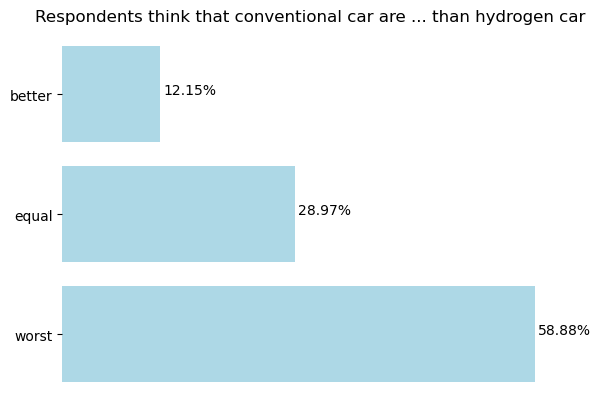

In [11]:
# Comparison between conventionnal and hydrogen cars

k_best = 0
k_eq = 0
k_worst = 0

for i in range(len(df['conventional_car'])) :
    if df['conventional_car'][i] == 'Une meilleure solution':
        k_best += 1
    elif df['conventional_car'][i] == 'Une solution égale':
        k_eq += 1
    else :
        k_worst += 1
        
av_best = (k_best/len_df)*100
av_eq = (k_eq/len_df)*100
av_worst = (k_worst/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['better', 'equal', 'worst']
y_pos = np.arange(len(x_subjects))

percentage = [av_best, av_eq, av_worst]

ax.barh(y_pos, percentage, align='center', color = 'lightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Respondents think that conventional car are ... than hydrogen car')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

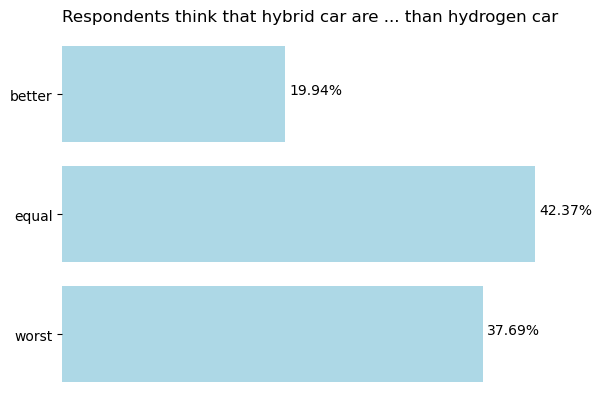

In [12]:
# Comparison between hybrid and hydrogen cars

k_best = 0
k_eq = 0
k_worst = 0

for i in range(len(df['hybrides_car'])) :
    if df['hybrides_car'][i] == 'Une meilleure solution':
        k_best += 1
    elif df['hybrides_car'][i] == 'Une solution égale':
        k_eq += 1
    else :
        k_worst += 1
        
av_best = (k_best/len_df)*100
av_eq = (k_eq/len_df)*100
av_worst = (k_worst/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['better', 'equal', 'worst']
y_pos = np.arange(len(x_subjects))

percentage = [av_best, av_eq, av_worst]

ax.barh(y_pos, percentage, align='center', color = 'lightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Respondents think that hybrid car are ... than hydrogen car')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

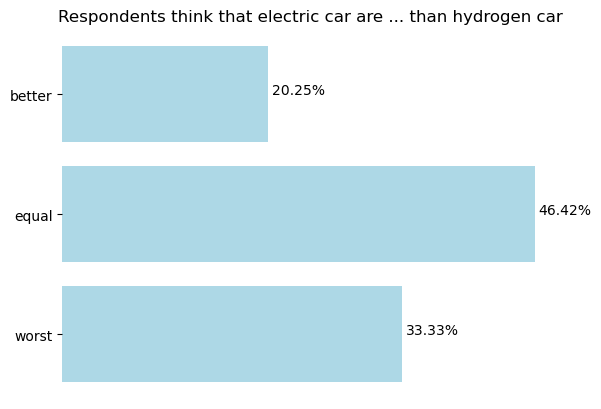

In [13]:
# Comparison between electric and hydrogen cars

k_best = 0
k_eq = 0
k_worst = 0

for i in range(len(df['electric_car'])) :
    if df['electric_car'][i] == 'Une meilleure solution':
        k_best += 1
    elif df['electric_car'][i] == 'Une solution égale':
        k_eq += 1
    else :
        k_worst += 1
        
av_best = (k_best/len_df)*100
av_eq = (k_eq/len_df)*100
av_worst = (k_worst/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['better', 'equal', 'worst']
y_pos = np.arange(len(x_subjects))

percentage = [av_best, av_eq, av_worst]

ax.barh(y_pos, percentage, align='center', color = 'lightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Respondents think that electric car are ... than hydrogen car')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

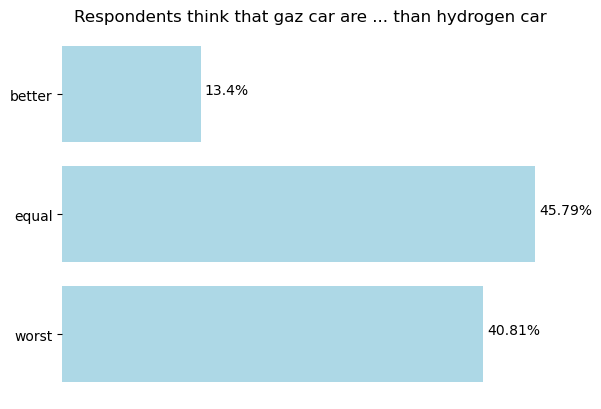

In [14]:
# Comparison between gaz and hydrogen car
k_best = 0
k_eq = 0
k_worst = 0

for i in range(len(df['gaz_car'])) :
    if df['gaz_car'][i] == 'Une meilleure solution':
        k_best += 1
    elif df['gaz_car'][i] == 'Une solution égale':
        k_eq += 1
    else :
        k_worst += 1
        
av_best = (k_best/len_df)*100
av_eq = (k_eq/len_df)*100
av_worst = (k_worst/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['better', 'equal', 'worst']
y_pos = np.arange(len(x_subjects))

percentage = [av_best, av_eq, av_worst]

ax.barh(y_pos, percentage, align='center', color = 'lightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis() 
ax.set_title('Respondents think that gaz car are ... than hydrogen car')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

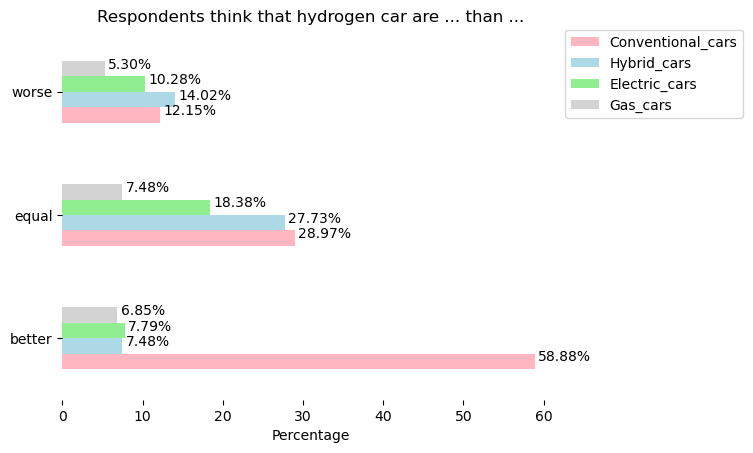

In [15]:
# Compatison between all type cars
n_conv = 0
n_hy = 0
n_elec = 0
n_gaz = 0 
tot = 0

for i in range(len_df):
    if df['conventional_car'][i] == 'Une moins bonne solution' :
        n_conv += 1
    elif df['hybrides_car'][i] == 'Une moins bonne solution' :
        n_hy += 1
    elif df['electric_car'][i] == 'Une moins bonne solution' :
        n_elec += 1
    elif df['gaz_car'][i] == 'Une moins bonne solution' :
        n_gaz += 1
        

av_k1_best = (n_conv/len_df)*100
av_k2_best = (n_hy/len_df)*100
av_k3_best = (n_elec/len_df)*100
av_k4_best = (n_gaz/len_df)*100


n_conv = 0
n_hy = 0
n_elec = 0
n_gaz = 0 
tot = 0

for i in range(len_df):
    if df['conventional_car'][i] == 'Une solution égale' :
        n_conv += 1
    elif df['hybrides_car'][i] == 'Une solution égale' :
        n_hy += 1
    elif df['electric_car'][i] == 'Une solution égale' :
        n_elec += 1
    elif df['gaz_car'][i] == 'Une solution égale' :
        n_gaz += 1
        

av_k1_equal = (n_conv/len_df)*100
av_k2_equal = (n_hy/len_df)*100
av_k3_equal = (n_elec/len_df)*100
av_k4_equal = (n_gaz/len_df)*100

n_conv = 0
n_hy = 0
n_elec = 0
n_gaz = 0 
tot = 0

for i in range(len_df):
    if df['conventional_car'][i] == 'Une meilleure solution' :
        n_conv += 1
    elif df['hybrides_car'][i] == 'Une meilleure solution' :
        n_hy += 1
    elif df['electric_car'][i] == 'Une meilleure solution' :
        n_elec += 1
    elif df['gaz_car'][i] == 'Une meilleure solution' :
        n_gaz += 1
        

av_k1_worse = (n_conv/len_df)*100
av_k2_worse = (n_hy/len_df)*100
av_k3_worse = (n_elec/len_df)*100
av_k4_worse = (n_gaz/len_df)*100



index = ['better', 'equal', 'worse']

df3 = pd.DataFrame(data={'Conventional_cars':[av_k1_best, av_k1_equal, av_k1_worse],
                         'Hybrid_cars': [av_k2_best, av_k2_equal, av_k2_worse],
                         'Electric_cars': [av_k3_best, av_k3_equal, av_k3_worse],
                         'Gas_cars': [av_k4_best, av_k4_equal, av_k4_worse]}, index=index)

colors = ['lightpink', 'lightblue', 'lightgreen', 'lightgrey']
ax = df3.plot(kind='barh', title='Respondents think that hydrogen car are ... than ...', color = colors)
ax.set(xlabel='Percentage')

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{width:.2f}'
    
    label_x = x + width / 2
    label_y = y + height / 2
    
    if width > 0:
        ax.text(float(label_text) + 0.4, label_y , label_text+'%')

    
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# Analysis of Policies

In [8]:
# Classify questions about importance of characteristics of H2

for i in range(len(df['subject_know'])):
    if df['subject_know'][i] == "Pas du tout important" : 
        df['subject_know'][i] = 0;
    elif df['subject_know'][i] == "Peu important" :
        df['subject_know'][i] = 1; 
    elif df['subject_know'][i] == "Moyennement important" :
        df['subject_know'][i] = 2;
    elif df['subject_know'][i] == "Fort important" : 
        df['subject_know'][i] = 3; 
    else :
        df['subject_know'][i] = 4;
        
        
    if df['law_elaboration'][i] == "Pas du tout important" : 
        df['law_elaboration'][i] = 0;
    elif df['law_elaboration'][i] == "Peu important" :
        df['law_elaboration'][i] = 1; 
    elif df['law_elaboration'][i] == "Moyennement important" :
        df['law_elaboration'][i] = 2;
    elif df['law_elaboration'][i] == "Fort important" : 
        df['law_elaboration'][i] = 3; 
    else :
        df['law_elaboration'][i] = 4;
        
        
    if df['h2_purchasePrice'][i] == "Pas du tout important" : 
        df['h2_purchasePrice'][i] = 0;
    elif df['h2_purchasePrice'][i] == "Peu important" :
        df['h2_purchasePrice'][i] = 1; 
    elif df['h2_purchasePrice'][i] == "Moyennement important" :
        df['h2_purchasePrice'][i] = 2;
    elif df['h2_purchasePrice'][i] == "Fort important" : 
        df['h2_purchasePrice'][i] = 3; 
    else :
        df['h2_purchasePrice'][i] = 4;
        
        
    if df['h2_price'][i] == "Pas du tout important" : 
        df['h2_price'][i] = 0;
    elif df['h2_price'][i] == "Peu important" :
        df['h2_price'][i] = 1; 
    elif df['h2_price'][i] == "Moyennement important" :
        df['h2_price'][i] = 2;
    elif df['h2_price'][i] == "Fort important" : 
        df['h2_price'][i] = 3; 
    else :
        df['h2_price'][i] = 4;
        
        
    if df['otherfuel_price'][i] == "Pas du tout important" : 
        df['otherfuel_price'][i] = 0;
    elif df['otherfuel_price'][i] == "Peu important" :
        df['otherfuel_price'][i] = 1; 
    elif df['otherfuel_price'][i] == "Moyennement important" :
        df['otherfuel_price'][i] = 2;
    elif df['otherfuel_price'][i] == "Fort important" : 
        df['otherfuel_price'][i] = 3; 
    else :
        df['otherfuel_price'][i] = 4;
        
        
    if df['h2_security'][i] == "Pas du tout important" : 
        df['h2_security'][i] = 0;
    elif df['h2_security'][i] == "Peu important" :
        df['h2_security'][i] = 1; 
    elif df['h2_security'][i] == "Moyennement important" :
        df['h2_security'][i] = 2;
    elif df['h2_security'][i] == "Fort important" : 
        df['h2_security'][i] = 3; 
    else :
        df['h2_security'][i] = 4;
        
        
    if df['h2_station'][i] == "Pas du tout important" : 
        df['h2_station'][i] = 0;
    elif df['h2_station'][i] == "Peu important" :
        df['h2_station'][i] = 1; 
    elif df['h2_station'][i] == "Moyennement important" :
        df['h2_station'][i] = 2;
    elif df['h2_station'][i] == "Fort important" : 
        df['h2_station'][i] = 3; 
    else :
        df['h2_station'][i] = 4;
        
        
    if df['h2_automony'][i] == "Pas du tout important" : 
        df['h2_automony'][i] = 0;
    elif df['h2_automony'][i] == "Peu important" :
        df['h2_automony'][i] = 1; 
    elif df['h2_automony'][i] == "Moyennement important" :
        df['h2_automony'][i] = 2;
    elif df['h2_automony'][i] == "Fort important" : 
        df['h2_automony'][i] = 3; 
    else :
        df['h2_automony'][i] = 4;
        
                
    if df['dimImportation'][i] == "Pas du tout important" : 
        df['dimImportation'][i] = 0;
    elif df['dimImportation'][i] == "Peu important" :
        df['dimImportation'][i] = 1; 
    elif df['dimImportation'][i] == "Moyennement important" :
        df['dimImportation'][i] = 2;
    elif df['dimImportation'][i] == "Fort important" : 
        df['dimImportation'][i] = 3; 
    else :
        df['dimImportation'][i] = 4;
        
        
    if df['gazReduction'][i] == "Pas du tout important" : 
        df['gazReduction'][i] = 0;
    elif df['gazReduction'][i] == "Peu important" :
        df['gazReduction'][i] = 1; 
    elif df['gazReduction'][i] == "Moyennement important" :
        df['gazReduction'][i] = 2;
    elif df['gazReduction'][i] == "Fort important" : 
        df['gazReduction'][i] = 3; 
    else :
        df['gazReduction'][i] = 4;
        
        
    if df['atmos_reduction_urban'][i] == "Pas du tout important" : 
        df['atmos_reduction_urban'][i] = 0;
    elif df['atmos_reduction_urban'][i] == "Peu important" :
        df['atmos_reduction_urban'][i] = 1; 
    elif df['atmos_reduction_urban'][i] == "Moyennement important" :
        df['atmos_reduction_urban'][i] = 2;
    elif df['atmos_reduction_urban'][i] == "Fort important" : 
        df['atmos_reduction_urban'][i] = 3; 
    else :
        df['atmos_reduction_urban'][i] = 4;
        
        
    if df['Belgium_company'][i] == "Pas du tout important" : 
        df['Belgium_company'][i] = 0;
    elif df['Belgium_company'][i] == "Peu important" :
        df['Belgium_company'][i] = 1; 
    elif df['Belgium_company'][i] == "Moyennement important" :
        df['Belgium_company'][i] = 2;
    elif df['Belgium_company'][i] == "Fort important" : 
        df['Belgium_company'][i] = 3; 
    else :
        df['Belgium_company'][i] = 4;
        
        
    # Part 3 : If ...
    if df['everything_equal'][i] == "Pas du tout intéressé.e" : 
        df['everything_equal'][i] = 0;
    elif df['everything_equal'][i] == "Peu intéressé.e" :
        df['everything_equal'][i] = 1; 
    elif df['everything_equal'][i] == "Moyennement intéressé.e" :
        df['everything_equal'][i] = 2;
    elif df['everything_equal'][i] == "Un peu intéressé.e" : 
        df['everything_equal'][i] = 3; 
    else :
        df['everything_equal'][i] = 4;
        
    if df['subside'][i] == "Pas du tout intéressé.e" : 
        df['subside'][i] = 0;
    elif df['subside'][i] == "Peu intéressé.e" :
        df['subside'][i] = 1; 
    elif df['subside'][i] == "Moyennement intéressé.e" :
        df['subside'][i] = 2;
    elif df['subside'][i] == "Un peu intéressé.e" : 
        df['subside'][i] = 3; 
    else :
        df['subside'][i] = 4;
        
        
    if df['diesel_no_in_town'][i] == "Pas du tout intéressé.e" : 
        df['diesel_no_in_town'][i] = 0;
    elif df['diesel_no_in_town'][i] == "Peu intéressé.e" :
        df['diesel_no_in_town'][i] = 1; 
    elif df['diesel_no_in_town'][i] == "Moyennement intéressé.e" :
        df['diesel_no_in_town'][i] = 2;
    elif df['diesel_no_in_town'][i] == "Un peu intéressé.e" : 
        df['diesel_no_in_town'][i] = 3; 
    else :
        df['diesel_no_in_town'][i] = 4;
        
    if df['essence_no_in_town'][i] == "Pas du tout intéressé.e" : 
        df['essence_no_in_town'][i] = 0;
    elif df['essence_no_in_town'][i] == "Peu intéressé.e" :
        df['essence_no_in_town'][i] = 1; 
    elif df['essence_no_in_town'][i] == "Moyennement intéressé.e" :
        df['essence_no_in_town'][i] = 2;
    elif df['essence_no_in_town'][i] == "Un peu intéressé.e" : 
        df['essence_no_in_town'][i] = 3; 
    else :
        df['essence_no_in_town'][i] = 4;
        
    # Km limitation
    if df['km_limitation'][i] == "1 000 km" : 
        df['km_limitation'][i] = 1000;
    elif df['km_limitation'][i] == "2 500 km" :
        df['km_limitation'][i] = 2500; 
    elif df['km_limitation'][i] == "5 000 km" :
        df['km_limitation'][i] = 5000;
    elif df['km_limitation'][i] == "10 000 km" : 
        df['km_limitation'][i] = 10000; 
    else :
        df['km_limitation'][i] = 20000;
    

df 

<ipython-input-8-55365bcb399d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subject_know'][i] = 3;
<ipython-input-8-55365bcb399d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['law_elaboration'][i] = 1;
<ipython-input-8-55365bcb399d>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['h2_purchasePrice'][i] = 4;
<ipython-input-8-55365bcb399d>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

<ipython-input-8-55365bcb399d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['h2_station'][i] = 1;


,sex,age,Province,livingPlace,zipCode,kmYear_beforeCovid,kmYear_afterCovid,BeforeAfterCovid,studyYear,Profession,...,h2_automony,dimImportation,gazReduction,atmos_reduction_urban,Belgium_company,everything_equal,subside,diesel_no_in_town,essence_no_in_town,km_limitation
0,Homme,0,Liège,En périphérie,4860,Entre 10 000 et 15 000,Entre 10 000 et 15 000,sont restés stables,Master,Etudiant,...,3,2,3,4,1,3,3,4,4,5000
1,Femme,0,Liège,En périphérie,4420,Entre 10 000 et 15 000,Entre 10 000 et 15 000,sont restés stables,Master,Employé,...,4,3,3,3,2,4,4,2,4,5000
2,Femme,0,Liège,En périphérie,4540,Plus de 20 000,Entre 15 000 et 20 000,Ont diminué,Bachelier,Employé,...,3,3,3,3,3,4,3,2,2,10000
3,Homme,0,Liège,A la campagne,4700,Moins de 10 000,Moins de 10 000,sont restés stables,Bachelier,Etudiant,...,2,4,4,4,4,3,4,3,3,20000
4,Homme,0,Liège,A la campagne,4550,Plus de 20 000,Plus de 20 000,sont restés stables,Bachelier,Employé,...,4,4,4,4,4,4,4,2,4,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Homme,1,Luxembourg,A la campagne,6769,Plus de 20 000,Plus de 20 000,sont restés stables,Master,Indépendant,...,2,4,4,4,4,4,4,4,4,1000
317,Femme,1,Namur,En centre ville,1340,Moins de 10 000,Moins de 10 000,sont restés stables,Master,Etudiant,...,3,2,4,4,3,1,1,2,2,1000
318,Homme,1,Namur,A la campagne,5020,Entre 15 000 et 20 000,Plus de 20 000,Ont augmenté,Master,Indépendant,...,4,4,4,4,4,4,4,0,4,20000
319,Homme,2,Namur,A la campagne,5640,Plus de 20 000,Entre 15 000 et 20 000,sont restés stables,Pilote de ligne,Retraité,...,2,2,0,0,2,3,4,4,4,20000


In [9]:
## CODE TAKEN FROM : https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = ['lightpink', 'lightblue', 'lightgreen', 'lightgrey']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)], zorder = 3)

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(),loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
        #ax.legend(bars, data.keys())

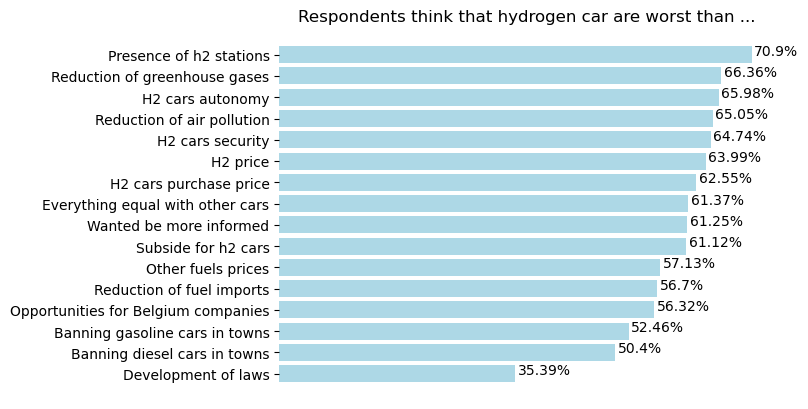

In [11]:
# Comparison in general

sum_subject_know = 0
sum_law_elaboration = 0
sum_h2_purchasePrice = 0
sum_h2_price = 0
sum_otherfuel_price = 0
sum_h2_security = 0 
sum_h2_station = 0
sum_h2_automony = 0
sum_dimImportation = 0
sum_gazReduction = 0
sum_atmos_reduction_urban = 0
sum_Belgium_company = 0

sum_everything_equal = 0
sum_subside = 0
sum_diesel_no_in_town = 0
sum_essence_no_in_town = 0


for i in range(len_df):
    sum_subject_know += df['subject_know'][i]
    sum_law_elaboration += df['law_elaboration'][i]
    sum_h2_purchasePrice += df['h2_purchasePrice'][i]
    sum_h2_price += df['h2_price'][i]
    sum_otherfuel_price += df['otherfuel_price'][i]
    sum_h2_security += df['h2_security'][i]
    sum_h2_station += df['h2_station'][i]
    sum_h2_automony += df['h2_automony'][i]
    sum_dimImportation += df['dimImportation'][i]
    sum_gazReduction += df['gazReduction'][i]
    sum_atmos_reduction_urban += df['atmos_reduction_urban'][i]
    sum_Belgium_company += df['Belgium_company'][i]
    
    sum_everything_equal += df['everything_equal'][i]
    sum_subside += df['subside'][i]
    sum_diesel_no_in_town += df['diesel_no_in_town'][i]
    sum_essence_no_in_town += df['essence_no_in_town'][i]
    
    

# Average for each
av_subject_know = (sum_subject_know/len_df)*20
av_law_elaboration = (sum_law_elaboration/len_df)*20
av_h2_purchasePrice = (sum_h2_purchasePrice/len_df)*20
av_h2_price = (sum_h2_price/len_df)*20
av_otherfuel_price = (sum_otherfuel_price/len_df)*20
av_h2_security = (sum_h2_security/len_df)*20
av_h2_station = (sum_h2_station/len_df)*20
av_h2_automony = (sum_h2_automony/len_df)*20
av_dimImportation = (sum_dimImportation/len_df)*20
av_gazReduction = (sum_gazReduction/len_df)*20
av_atmos_reduction_urban = (sum_atmos_reduction_urban/len_df)*20
av_Belgium_company = (sum_Belgium_company/len_df)*20

av_everything_equal = (sum_everything_equal/len_df)*20
av_subside = (sum_subside/len_df)*20
av_diesel_no_in_town = (sum_diesel_no_in_town/len_df)*20
av_essence_no_in_town = (sum_essence_no_in_town/len_df)*20


# Graphic plots
dico = {"subject_know": av_subject_know, "law_elaboration":av_law_elaboration, "h2_purchasePrice":av_h2_purchasePrice,
       "h2_price": av_h2_price, "otherfuel_price": av_otherfuel_price, "h2_security": av_h2_security,
       "h2_station":av_h2_station, "h2_automony":av_h2_automony, "dimImportation":av_dimImportation,
       "gazReduction": av_gazReduction, "atmos_reduction_urban": av_atmos_reduction_urban, 
       "Belgium_company": av_Belgium_company,
        "everything_equal": av_everything_equal, "subside":av_subside, 
       "diesel_no_in_town":av_diesel_no_in_town, "essence_no_in_town": av_essence_no_in_town}

x_subjects = []
y_values = []

for x, v in sorted(dico.items(), key=lambda x: x[1]):
    x_subjects.append(x)
    y_values.append(v)  


plt.rcdefaults()
fig, ax = plt.subplots()


x_subject = ['Development of laws', 'Banning diesel cars in towns', 'Banning gasoline cars in towns', 
    'Opportunities for Belgium companies', 'Reduction of fuel imports', 'Other fuels prices', 'Subside for h2 cars', 
          'Wanted be more informed', 'Everything equal with other cars', 'H2 cars purchase price', 'H2 price',
          'H2 cars security', 'Reduction of air pollution', 'H2 cars autonomy','Reduction of greenhouse gases', 
          'Presence of h2 stations']


percentage = [av_law_elaboration, av_diesel_no_in_town, av_essence_no_in_town,av_Belgium_company,
            av_dimImportation,av_otherfuel_price, av_subside, av_subject_know,
                av_everything_equal,av_h2_purchasePrice,av_h2_price,av_h2_security,
              av_atmos_reduction_urban, av_h2_automony,av_gazReduction,av_h2_station]

y_pos = np.arange(len(x_subjects))

ax.barh(y_pos, percentage, align='center', color = 'lightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subject)

ax.set_title('Respondents think that hydrogen car are worst than ...')
fig.patch.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])

for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')


plt.show()

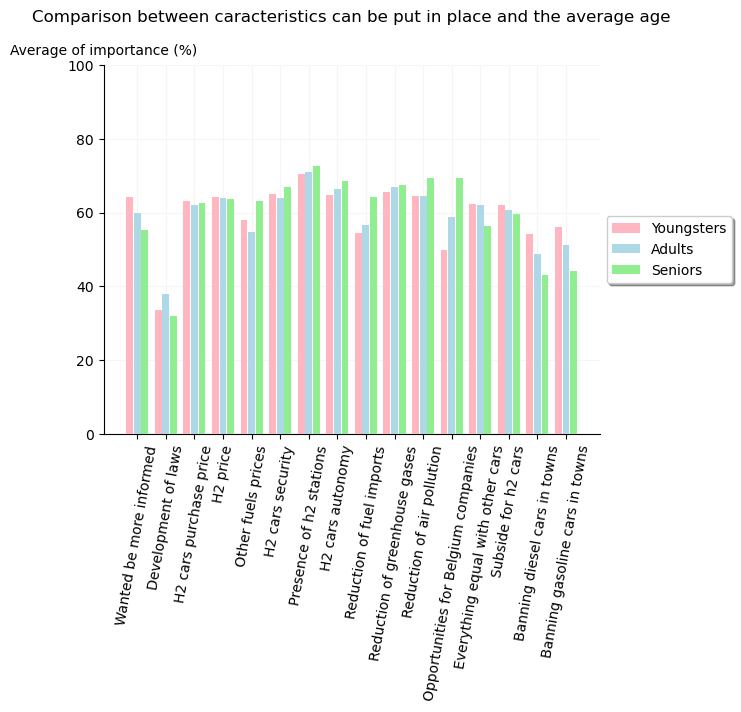

In [12]:
# Comparison between caracteristics can be put in place and the average age

sum_subject_know = 0
sum_law_elaboration = 0
sum_h2_purchasePrice = 0
sum_h2_price = 0
sum_otherfuel_price = 0
sum_h2_security = 0 
sum_h2_station = 0
sum_h2_automony = 0
sum_dimImportation = 0
sum_gazReduction = 0
sum_atmos_reduction_urban = 0
sum_Belgium_company = 0
sum_everything_equal = 0
sum_subside = 0
sum_diesel_no_in_town = 0
sum_essence_no_in_town = 0

sum_subject_know_1 = 0
sum_law_elaboration_1 = 0
sum_h2_purchasePrice_1 = 0
sum_h2_price_1 = 0
sum_otherfuel_price_1 = 0
sum_h2_security_1 = 0 
sum_h2_station_1 = 0
sum_h2_automony_1 = 0
sum_dimImportation_1 = 0
sum_gazReduction_1 = 0
sum_atmos_reduction_urban_1 = 0
sum_Belgium_company_1 = 0
sum_everything_equal_1 = 0
sum_subside_1 = 0
sum_diesel_no_in_town_1 = 0
sum_essence_no_in_town_1 = 0

sum_subject_know_2 = 0
sum_law_elaboration_2 = 0
sum_h2_purchasePrice_2 = 0
sum_h2_price_2 = 0
sum_otherfuel_price_2 = 0
sum_h2_security_2 = 0 
sum_h2_station_2 = 0
sum_h2_automony_2 = 0
sum_dimImportation_2 = 0
sum_gazReduction_2 = 0
sum_atmos_reduction_urban_2 = 0
sum_Belgium_company_2 = 0
sum_everything_equal_2 = 0
sum_subside_2 = 0
sum_diesel_no_in_town_2 = 0
sum_essence_no_in_town_2 = 0

av_subject_know = 0
av_law_elaboration = 0
av_h2_purchasePrice = 0
av_h2_price = 0
av_otherfuel_price = 0
av_h2_security = 0
av_h2_station = 0
av_h2_automony = 0
av_dimImportation = 0
av_gazReduction = 0
av_atmos_reduction_urban = 0
av_Belgium_company = 0
av_everything_equal = 0
av_subside = 0
av_diesel_no_in_town = 0
av_essence_no_in_town = 0

av_subject_know_1 = 0
av_law_elaboration_1 = 0
av_h2_purchasePrice_1 = 0
av_h2_price_1 = 0
av_otherfuel_price_1 = 0
av_h2_security_1 = 0 
av_h2_station_1 = 0
av_h2_automony_1 = 0
av_dimImportation_1 = 0
av_gazReduction_1 = 0
av_atmos_reduction_urban_1 = 0
av_Belgium_company_1 = 0
av_everything_equal_1 = 0
av_subside_1 = 0
av_diesel_no_in_town_1 = 0
av_essence_no_in_town_1 = 0

av_subject_know_2 = 0
av_law_elaboration_2 = 0
av_h2_purchasePrice_2 = 0
av_h2_price_2 = 0
av_otherfuel_price_2 = 0
av_h2_security_2 = 0 
av_h2_station_2 = 0
av_h2_automony_2 = 0
av_dimImportation_2 = 0
av_gazReduction_2 = 0
av_atmos_reduction_urban_2 = 0
av_Belgium_company_2 = 0
av_everything_equal_2 = 0
av_subside_2 = 0
av_diesel_no_in_town_2 = 0
av_essence_no_in_town_2 = 0


sum_cat = 0
sum_cat_1 = 0
sum_cat_2 = 0

for i in range(len_df):
    if df['age'][i] == 0 : 
        sum_cat += 1
        sum_subject_know += df['subject_know'][i]
        sum_law_elaboration += df['law_elaboration'][i]
        sum_h2_purchasePrice += df['h2_purchasePrice'][i]
        sum_h2_price += df['h2_price'][i]
        sum_otherfuel_price += df['otherfuel_price'][i]
        sum_h2_security += df['h2_security'][i]
        sum_h2_station += df['h2_station'][i]
        sum_h2_automony += df['h2_automony'][i]
        sum_dimImportation += df['dimImportation'][i]
        sum_gazReduction += df['gazReduction'][i]
        sum_atmos_reduction_urban += df['atmos_reduction_urban'][i]
        sum_Belgium_company += df['Belgium_company'][i]

        sum_everything_equal += df['everything_equal'][i]
        sum_subside += df['subside'][i]
        sum_diesel_no_in_town += df['diesel_no_in_town'][i]
        sum_essence_no_in_town += df['essence_no_in_town'][i]
        
    elif df['age'][i] == 1:
        sum_cat_1 += 1
        sum_subject_know_1 += df['subject_know'][i]
        sum_law_elaboration_1 += df['law_elaboration'][i]
        sum_h2_purchasePrice_1 += df['h2_purchasePrice'][i]
        sum_h2_price_1 += df['h2_price'][i]
        sum_otherfuel_price_1 += df['otherfuel_price'][i]
        sum_h2_security_1 += df['h2_security'][i]
        sum_h2_station_1 += df['h2_station'][i]
        sum_h2_automony_1 += df['h2_automony'][i]
        sum_dimImportation_1 += df['dimImportation'][i]
        sum_gazReduction_1 += df['gazReduction'][i]
        sum_atmos_reduction_urban_1 += df['atmos_reduction_urban'][i]
        sum_Belgium_company_1 += df['Belgium_company'][i]

        sum_everything_equal_1 += df['everything_equal'][i]
        sum_subside_1 += df['subside'][i]
        sum_diesel_no_in_town_1 += df['diesel_no_in_town'][i]
        sum_essence_no_in_town_1 += df['essence_no_in_town'][i]
        
    elif df['age'][i] == 2:
        sum_cat_2 += 1
        sum_subject_know_2 += df['subject_know'][i]
        sum_law_elaboration_2 += df['law_elaboration'][i]
        sum_h2_purchasePrice_2 += df['h2_purchasePrice'][i]
        sum_h2_price_2 += df['h2_price'][i]
        sum_otherfuel_price_2 += df['otherfuel_price'][i]
        sum_h2_security_2 += df['h2_security'][i]
        sum_h2_station_2 += df['h2_station'][i]
        sum_h2_automony_2 += df['h2_automony'][i]
        sum_dimImportation_2 += df['dimImportation'][i]
        sum_gazReduction_2 += df['gazReduction'][i]
        sum_atmos_reduction_urban_2 += df['atmos_reduction_urban'][i]
        sum_Belgium_company_2 += df['Belgium_company'][i]

        sum_everything_equal_2 += df['everything_equal'][i]
        sum_subside_2 += df['subside'][i]
        sum_diesel_no_in_town_2 += df['diesel_no_in_town'][i]
        sum_essence_no_in_town_2 += df['essence_no_in_town'][i]  
        

    

# Average for each
av_subject_know = (sum_subject_know/sum_cat)*20
av_law_elaboration = (sum_law_elaboration/sum_cat)*20
av_h2_purchasePrice = (sum_h2_purchasePrice/sum_cat)*20
av_h2_price = (sum_h2_price/sum_cat)*20
av_otherfuel_price = (sum_otherfuel_price/sum_cat)*20
av_h2_security = (sum_h2_security/sum_cat)*20
av_h2_station = (sum_h2_station/sum_cat)*20
av_h2_automony = (sum_h2_automony/sum_cat)*20
av_dimImportation = (sum_dimImportation/sum_cat)*20
av_gazReduction = (sum_gazReduction/sum_cat)*20
av_atmos_reduction_urban = (sum_atmos_reduction_urban/sum_cat)*20
av_Belgium_company = (sum_Belgium_company/sum_cat)*20
av_everything_equal = (sum_everything_equal/sum_cat)*20
av_subside = (sum_subside/sum_cat)*20
av_diesel_no_in_town = (sum_diesel_no_in_town/sum_cat)*20
av_essence_no_in_town = (sum_essence_no_in_town/sum_cat)*20

# Average for each of category 1
av_subject_know_1 = (sum_subject_know_1/sum_cat_1)*20
av_law_elaboration_1 = (sum_law_elaboration_1/sum_cat_1)*20
av_h2_purchasePrice_1 = (sum_h2_purchasePrice_1/sum_cat_1)*20
av_h2_price_1 = (sum_h2_price_1/sum_cat_1)*20
av_otherfuel_price_1 = (sum_otherfuel_price_1/sum_cat_1)*20
av_h2_security_1 = (sum_h2_security_1/sum_cat_1)*20
av_h2_station_1 = (sum_h2_station_1/sum_cat_1)*20
av_h2_automony_1 = (sum_h2_automony_1/sum_cat_1)*20
av_dimImportation_1 = (sum_dimImportation_1/sum_cat_1)*20
av_gazReduction_1 = (sum_gazReduction_1/sum_cat_1)*20
av_atmos_reduction_urban_1 = (sum_atmos_reduction_urban_1/sum_cat_1)*20
av_Belgium_company_1 = (sum_Belgium_company_1/sum_cat_1)*20
av_everything_equal_1 = (sum_everything_equal_1/sum_cat_1)*20
av_subside_1 = (sum_subside_1/sum_cat_1)*20
av_diesel_no_in_town_1 = (sum_diesel_no_in_town_1/sum_cat_1)*20
av_essence_no_in_town_1 = (sum_essence_no_in_town_1/sum_cat_1)*20

# Average for each of category 2
av_subject_know_2 = (sum_subject_know_2/sum_cat_2)*20
av_law_elaboration_2 = (sum_law_elaboration_2/sum_cat_2)*20
av_h2_purchasePrice_2 = (sum_h2_purchasePrice_2/sum_cat_2)*20
av_h2_price_2 = (sum_h2_price_2/sum_cat_2)*20
av_otherfuel_price_2 = (sum_otherfuel_price_2/sum_cat_2)*20
av_h2_security_2 = (sum_h2_security_2/sum_cat_2)*20
av_h2_station_2 = (sum_h2_station_2/sum_cat_2)*20
av_h2_automony_2 = (sum_h2_automony_2/sum_cat_2)*20
av_dimImportation_2 = (sum_dimImportation_2/sum_cat_2)*20
av_gazReduction_2 = (sum_gazReduction_2/sum_cat_2)*20
av_atmos_reduction_urban_2 = (sum_atmos_reduction_urban_2/sum_cat_2)*20
av_Belgium_company_2 = (sum_Belgium_company_2/sum_cat_2)*20
av_everything_equal_2 = (sum_everything_equal_2/sum_cat_2)*20
av_subside_2 = (sum_subside_2/sum_cat_2)*20
av_diesel_no_in_town_2 = (sum_diesel_no_in_town_2/sum_cat_2)*20
av_essence_no_in_town_2 = (sum_essence_no_in_town_2/sum_cat_2)*20


data = {
    "Youngsters": [av_subject_know, av_law_elaboration, av_h2_purchasePrice, av_h2_price, av_otherfuel_price,
 av_h2_security, av_h2_station,av_h2_automony,av_dimImportation,av_gazReduction,
 av_atmos_reduction_urban,av_Belgium_company, av_everything_equal, av_subside,
 av_diesel_no_in_town,av_essence_no_in_town],
    "Adults": [av_subject_know_1, av_law_elaboration_1, av_h2_purchasePrice_1, av_h2_price_1, av_otherfuel_price_1,
 av_h2_security_1, av_h2_station_1,av_h2_automony_1,av_dimImportation_1,av_gazReduction_1,
 av_atmos_reduction_urban_1,av_Belgium_company_1, av_everything_equal_1, av_subside_1,
 av_diesel_no_in_town_1,av_essence_no_in_town_1 ],
    "Seniors": [av_subject_know_2, av_law_elaboration_2, av_h2_purchasePrice_2, av_h2_price_2, av_otherfuel_price_2,
 av_h2_security_2, av_h2_station_2,av_h2_automony_2,av_dimImportation_2,av_gazReduction_2,
 av_atmos_reduction_urban_2,av_Belgium_company_2, av_everything_equal_2, av_subside_2,
 av_diesel_no_in_town_2,av_essence_no_in_town_2 ]
}

fig, ax = plt.subplots()
#plt.axis("off")
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 

plt.ylim(0, 100)
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xticks(range(16), ['Wanted be more informed', 'Development of laws', 'H2 cars purchase price','H2 price', 'Other fuels prices',
 'H2 cars security', 'Presence of h2 stations','H2 cars autonomy','Reduction of fuel imports','Reduction of greenhouse gases',
 'Reduction of air pollution','Opportunities for Belgium companies', 'Everything equal with other cars', 'Subside for h2 cars',
 'Banning diesel cars in towns','Banning gasoline cars in towns'], rotation='vertical')

plt.title("Comparison between caracteristics can be put in place and the average age\n \n")
plt.ylabel('Average of importance (%)', rotation=0)
ax.yaxis.set_label_coords(0,1.02)
degrees = 80
plt.xticks(rotation=degrees)
ax.grid(zorder=0, color="whitesmoke")

plt.show()

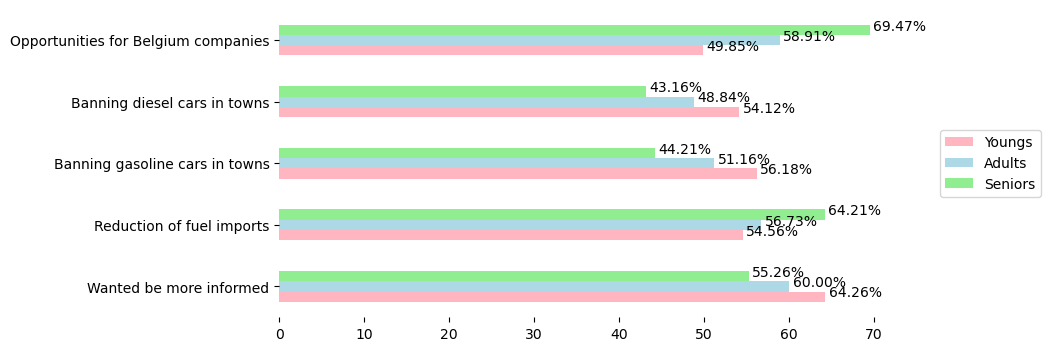

In [13]:
# Comparison between caracteristics can be put in place and the average age : Most important characteristics

index = ['Wanted be more informed','Reduction of fuel imports','Banning gasoline cars in towns','Banning diesel cars in towns','Opportunities for Belgium companies']


df3 = pd.DataFrame(data = {
    "Youngs": [av_subject_know,av_dimImportation, av_essence_no_in_town, av_diesel_no_in_town, 
               av_Belgium_company],
    "Adults": [av_subject_know_1,av_dimImportation_1, av_essence_no_in_town_1, av_diesel_no_in_town_1, 
               av_Belgium_company_1],
    "Seniors": [av_subject_know_2,av_dimImportation_2, av_essence_no_in_town_2, av_diesel_no_in_town_2, 
               av_Belgium_company_2]
}, index=index)

colors = ['lightpink', 'lightblue', 'lightgreen']
ax = df3.plot(kind='barh', color = colors, figsize=(8, 4))

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{width:.2f}' 
    
    label_x = x + width / 2
    label_y = y + height / 2
    
    if width > 0:
        ax.text(float(label_text) + 0.4, label_y , label_text+'%')

ax.legend(bbox_to_anchor=(1.24,0.50), loc="center right") #upper 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
for pos in ['right', 'top', 'bottom']: 
    plt.gca().spines[pos].set_visible(False) 

plt.show()

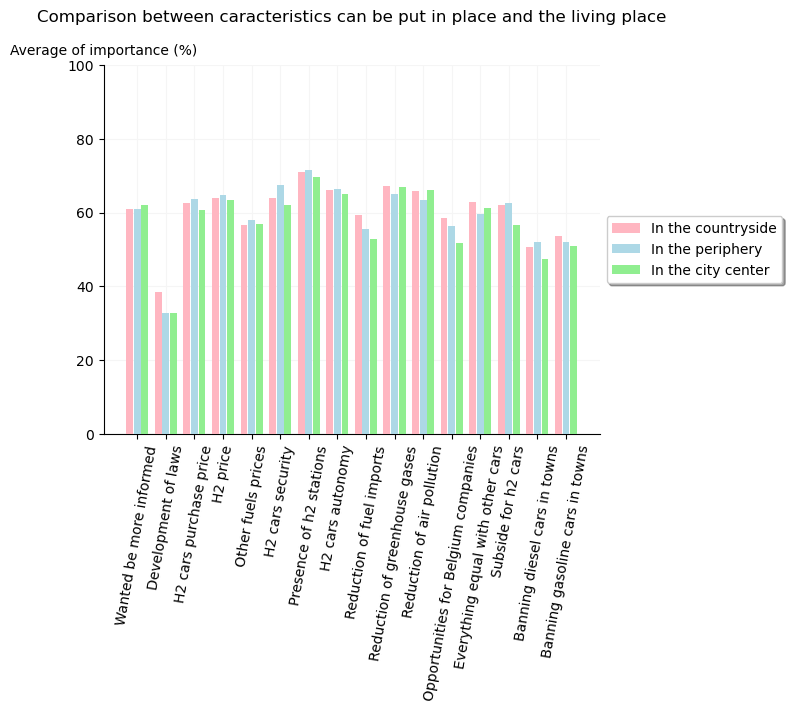

In [14]:
# Comparison depending of place of residence

sum_subject_know = 0
sum_law_elaboration = 0
sum_h2_purchasePrice = 0
sum_h2_price = 0
sum_otherfuel_price = 0
sum_h2_security = 0 
sum_h2_station = 0
sum_h2_automony = 0
sum_dimImportation = 0
sum_gazReduction = 0
sum_atmos_reduction_urban = 0
sum_Belgium_company = 0
sum_everything_equal = 0
sum_subside = 0
sum_diesel_no_in_town = 0
sum_essence_no_in_town = 0

sum_subject_know_1 = 0
sum_law_elaboration_1 = 0
sum_h2_purchasePrice_1 = 0
sum_h2_price_1 = 0
sum_otherfuel_price_1 = 0
sum_h2_security_1 = 0 
sum_h2_station_1 = 0
sum_h2_automony_1 = 0
sum_dimImportation_1 = 0
sum_gazReduction_1 = 0
sum_atmos_reduction_urban_1 = 0
sum_Belgium_company_1 = 0
sum_everything_equal_1 = 0
sum_subside_1 = 0
sum_diesel_no_in_town_1 = 0
sum_essence_no_in_town_1 = 0

sum_subject_know_2 = 0
sum_law_elaboration_2 = 0
sum_h2_purchasePrice_2 = 0
sum_h2_price_2 = 0
sum_otherfuel_price_2 = 0
sum_h2_security_2 = 0 
sum_h2_station_2 = 0
sum_h2_automony_2 = 0
sum_dimImportation_2 = 0
sum_gazReduction_2 = 0
sum_atmos_reduction_urban_2 = 0
sum_Belgium_company_2 = 0
sum_everything_equal_2 = 0
sum_subside_2 = 0
sum_diesel_no_in_town_2 = 0
sum_essence_no_in_town_2 = 0

av_subject_know = 0
av_law_elaboration = 0
av_h2_purchasePrice = 0
av_h2_price = 0
av_otherfuel_price = 0
av_h2_security = 0
av_h2_station = 0
av_h2_automony = 0
av_dimImportation = 0
av_gazReduction = 0
av_atmos_reduction_urban = 0
av_Belgium_company = 0
av_everything_equal = 0
av_subside = 0
av_diesel_no_in_town = 0
av_essence_no_in_town = 0

av_subject_know_1 = 0
av_law_elaboration_1 = 0
av_h2_purchasePrice_1 = 0
av_h2_price_1 = 0
av_otherfuel_price_1 = 0
av_h2_security_1 = 0 
av_h2_station_1 = 0
av_h2_automony_1 = 0
av_dimImportation_1 = 0
av_gazReduction_1 = 0
av_atmos_reduction_urban_1 = 0
av_Belgium_company_1 = 0
av_everything_equal_1 = 0
av_subside_1 = 0
av_diesel_no_in_town_1 = 0
av_essence_no_in_town_1 = 0

av_subject_know_2 = 0
av_law_elaboration_2 = 0
av_h2_purchasePrice_2 = 0
av_h2_price_2 = 0
av_otherfuel_price_2 = 0
av_h2_security_2 = 0 
av_h2_station_2 = 0
av_h2_automony_2 = 0
av_dimImportation_2 = 0
av_gazReduction_2 = 0
av_atmos_reduction_urban_2 = 0
av_Belgium_company_2 = 0
av_everything_equal_2 = 0
av_subside_2 = 0
av_diesel_no_in_town_2 = 0
av_essence_no_in_town_2 = 0


sum_cat = 0
sum_cat_1 = 0
sum_cat_2 = 0

for i in range(len_df):
    #if df['Province'][i] == 'Liège' :
        if df['livingPlace'][i] == "A la campagne" : 
            sum_cat += 1
            sum_subject_know += df['subject_know'][i]
            sum_law_elaboration += df['law_elaboration'][i]
            sum_h2_purchasePrice += df['h2_purchasePrice'][i]
            sum_h2_price += df['h2_price'][i]
            sum_otherfuel_price += df['otherfuel_price'][i]
            sum_h2_security += df['h2_security'][i]
            sum_h2_station += df['h2_station'][i]
            sum_h2_automony += df['h2_automony'][i]
            sum_dimImportation += df['dimImportation'][i]
            sum_gazReduction += df['gazReduction'][i]
            sum_atmos_reduction_urban += df['atmos_reduction_urban'][i]
            sum_Belgium_company += df['Belgium_company'][i]

            sum_everything_equal += df['everything_equal'][i]
            sum_subside += df['subside'][i]
            sum_diesel_no_in_town += df['diesel_no_in_town'][i]
            sum_essence_no_in_town += df['essence_no_in_town'][i]

        elif df['livingPlace'][i] == "En périphérie":
            sum_cat_1 += 1
            sum_subject_know_1 += df['subject_know'][i]
            sum_law_elaboration_1 += df['law_elaboration'][i]
            sum_h2_purchasePrice_1 += df['h2_purchasePrice'][i]
            sum_h2_price_1 += df['h2_price'][i]
            sum_otherfuel_price_1 += df['otherfuel_price'][i]
            sum_h2_security_1 += df['h2_security'][i]
            sum_h2_station_1 += df['h2_station'][i]
            sum_h2_automony_1 += df['h2_automony'][i]
            sum_dimImportation_1 += df['dimImportation'][i]
            sum_gazReduction_1 += df['gazReduction'][i]
            sum_atmos_reduction_urban_1 += df['atmos_reduction_urban'][i]
            sum_Belgium_company_1 += df['Belgium_company'][i]

            sum_everything_equal_1 += df['everything_equal'][i]
            sum_subside_1 += df['subside'][i]
            sum_diesel_no_in_town_1 += df['diesel_no_in_town'][i]
            sum_essence_no_in_town_1 += df['essence_no_in_town'][i]

        elif df['livingPlace'][i] == "En centre ville":
            sum_cat_2 += 1
            sum_subject_know_2 += df['subject_know'][i]
            sum_law_elaboration_2 += df['law_elaboration'][i]
            sum_h2_purchasePrice_2 += df['h2_purchasePrice'][i]
            sum_h2_price_2 += df['h2_price'][i]
            sum_otherfuel_price_2 += df['otherfuel_price'][i]
            sum_h2_security_2 += df['h2_security'][i]
            sum_h2_station_2 += df['h2_station'][i]
            sum_h2_automony_2 += df['h2_automony'][i]
            sum_dimImportation_2 += df['dimImportation'][i]
            sum_gazReduction_2 += df['gazReduction'][i]
            sum_atmos_reduction_urban_2 += df['atmos_reduction_urban'][i]
            sum_Belgium_company_2 += df['Belgium_company'][i]

            sum_everything_equal_2 += df['everything_equal'][i]
            sum_subside_2 += df['subside'][i]
            sum_diesel_no_in_town_2 += df['diesel_no_in_town'][i]
            sum_essence_no_in_town_2 += df['essence_no_in_town'][i]  


    

# Average for each
if(sum_cat != 0) : 
    av_subject_know = (sum_subject_know/sum_cat)*20
    av_law_elaboration = (sum_law_elaboration/sum_cat)*20
    av_h2_purchasePrice = (sum_h2_purchasePrice/sum_cat)*20
    av_h2_price = (sum_h2_price/sum_cat)*20
    av_otherfuel_price = (sum_otherfuel_price/sum_cat)*20
    av_h2_security = (sum_h2_security/sum_cat)*20
    av_h2_station = (sum_h2_station/sum_cat)*20
    av_h2_automony = (sum_h2_automony/sum_cat)*20
    av_dimImportation = (sum_dimImportation/sum_cat)*20
    av_gazReduction = (sum_gazReduction/sum_cat)*20
    av_atmos_reduction_urban = (sum_atmos_reduction_urban/sum_cat)*20
    av_Belgium_company = (sum_Belgium_company/sum_cat)*20
    av_everything_equal = (sum_everything_equal/sum_cat)*20
    av_subside = (sum_subside/sum_cat)*20
    av_diesel_no_in_town = (sum_diesel_no_in_town/sum_cat)*20
    av_essence_no_in_town = (sum_essence_no_in_town/sum_cat)*20

# Average for each of category 1
if(sum_cat_1 != 0) : 
    av_subject_know_1 = (sum_subject_know_1/sum_cat_1)*20
    av_law_elaboration_1 = (sum_law_elaboration_1/sum_cat_1)*20
    av_h2_purchasePrice_1 = (sum_h2_purchasePrice_1/sum_cat_1)*20
    av_h2_price_1 = (sum_h2_price_1/sum_cat_1)*20
    av_otherfuel_price_1 = (sum_otherfuel_price_1/sum_cat_1)*20
    av_h2_security_1 = (sum_h2_security_1/sum_cat_1)*20
    av_h2_station_1 = (sum_h2_station_1/sum_cat_1)*20
    av_h2_automony_1 = (sum_h2_automony_1/sum_cat_1)*20
    av_dimImportation_1 = (sum_dimImportation_1/sum_cat_1)*20
    av_gazReduction_1 = (sum_gazReduction_1/sum_cat_1)*20
    av_atmos_reduction_urban_1 = (sum_atmos_reduction_urban_1/sum_cat_1)*20
    av_Belgium_company_1 = (sum_Belgium_company_1/sum_cat_1)*20
    av_everything_equal_1 = (sum_everything_equal_1/sum_cat_1)*20
    av_subside_1 = (sum_subside_1/sum_cat_1)*20
    av_diesel_no_in_town_1 = (sum_diesel_no_in_town_1/sum_cat_1)*20
    av_essence_no_in_town_1 = (sum_essence_no_in_town_1/sum_cat_1)*20


if(sum_cat_2 != 0):
    av_subject_know_2 = (sum_subject_know_2/sum_cat_2)*20
    av_law_elaboration_2 = (sum_law_elaboration_2/sum_cat_2)*20
    av_h2_purchasePrice_2 = (sum_h2_purchasePrice_2/sum_cat_2)*20
    av_h2_price_2 = (sum_h2_price_2/sum_cat_2)*20
    av_otherfuel_price_2 = (sum_otherfuel_price_2/sum_cat_2)*20
    av_h2_security_2 = (sum_h2_security_2/sum_cat_2)*20
    av_h2_station_2 = (sum_h2_station_2/sum_cat_2)*20
    av_h2_automony_2 = (sum_h2_automony_2/sum_cat_2)*20
    av_dimImportation_2 = (sum_dimImportation_2/sum_cat_2)*20
    av_gazReduction_2 = (sum_gazReduction_2/sum_cat_2)*20
    av_atmos_reduction_urban_2 = (sum_atmos_reduction_urban_2/sum_cat_2)*20
    av_Belgium_company_2 = (sum_Belgium_company_2/sum_cat_2)*20
    av_everything_equal_2 = (sum_everything_equal_2/sum_cat_2)*20
    av_subside_2 = (sum_subside_2/sum_cat_2)*20
    av_diesel_no_in_town_2 = (sum_diesel_no_in_town_2/sum_cat_2)*20
    av_essence_no_in_town_2 = (sum_essence_no_in_town_2/sum_cat_2)*20


data = {
    "In the countryside": [av_subject_know, av_law_elaboration, av_h2_purchasePrice, av_h2_price, av_otherfuel_price,
 av_h2_security, av_h2_station,av_h2_automony,av_dimImportation,av_gazReduction,
 av_atmos_reduction_urban,av_Belgium_company, av_everything_equal, av_subside,
 av_diesel_no_in_town,av_essence_no_in_town],
    "In the periphery": [av_subject_know_1, av_law_elaboration_1, av_h2_purchasePrice_1, av_h2_price_1, av_otherfuel_price_1,
 av_h2_security_1, av_h2_station_1,av_h2_automony_1,av_dimImportation_1,av_gazReduction_1,
 av_atmos_reduction_urban_1,av_Belgium_company_1, av_everything_equal_1, av_subside_1,
 av_diesel_no_in_town_1,av_essence_no_in_town_1 ],
    "In the city center": [av_subject_know_2, av_law_elaboration_2, av_h2_purchasePrice_2, av_h2_price_2, av_otherfuel_price_2,
 av_h2_security_2, av_h2_station_2,av_h2_automony_2,av_dimImportation_2,av_gazReduction_2,
 av_atmos_reduction_urban_2,av_Belgium_company_2, av_everything_equal_2, av_subside_2,
 av_diesel_no_in_town_2,av_essence_no_in_town_2 ]
}

fig, ax = plt.subplots()
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.ylim(0, 100)
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xticks(range(16), ['Wanted be more informed', 'Development of laws', 'H2 cars purchase price','H2 price', 'Other fuels prices',
 'H2 cars security', 'Presence of h2 stations','H2 cars autonomy','Reduction of fuel imports','Reduction of greenhouse gases',
 'Reduction of air pollution','Opportunities for Belgium companies', 'Everything equal with other cars', 'Subside for h2 cars',
 'Banning diesel cars in towns','Banning gasoline cars in towns'], rotation='vertical')

plt.title("Comparison between caracteristics can be put in place and the living place\n \n")
plt.ylabel('Average of importance (%)', rotation=0)
ax.yaxis.set_label_coords(0,1.02)
degrees = 80
plt.xticks(rotation=degrees)
ax.grid(zorder=0, color="whitesmoke")
plt.show()



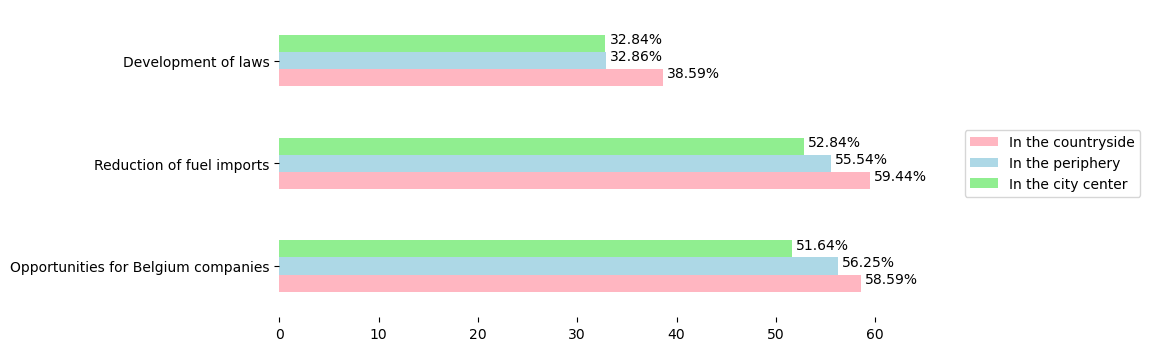

In [15]:
# Comparison between caracteristics can be put in place and the living place : most important characteristics

index = ['Opportunities for Belgium companies','Reduction of fuel imports' ,'Development of laws']


df3 = pd.DataFrame(data = {
    "In the countryside": [av_Belgium_company, av_dimImportation , av_law_elaboration],
    "In the periphery": [av_Belgium_company_1, av_dimImportation_1, av_law_elaboration_1],
    "In the city center": [av_Belgium_company_2, av_dimImportation_2, av_law_elaboration_2]
}, index=index)


colors = ['lightpink', 'lightblue', 'lightgreen']
ax = df3.plot(kind='barh', color = colors, figsize=(8, 4)) 
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{width:.2f}'
    
    label_x = x + width / 2
    label_y = y + height / 2
    
    if width > 0:
        ax.text(float(label_text) + 0.4, label_y , label_text+'%')

ax.legend(bbox_to_anchor=(1.40,0.50), loc="center right") #upper 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
for pos in ['right', 'top', 'bottom']: 
    plt.gca().spines[pos].set_visible(False) 

plt.show()

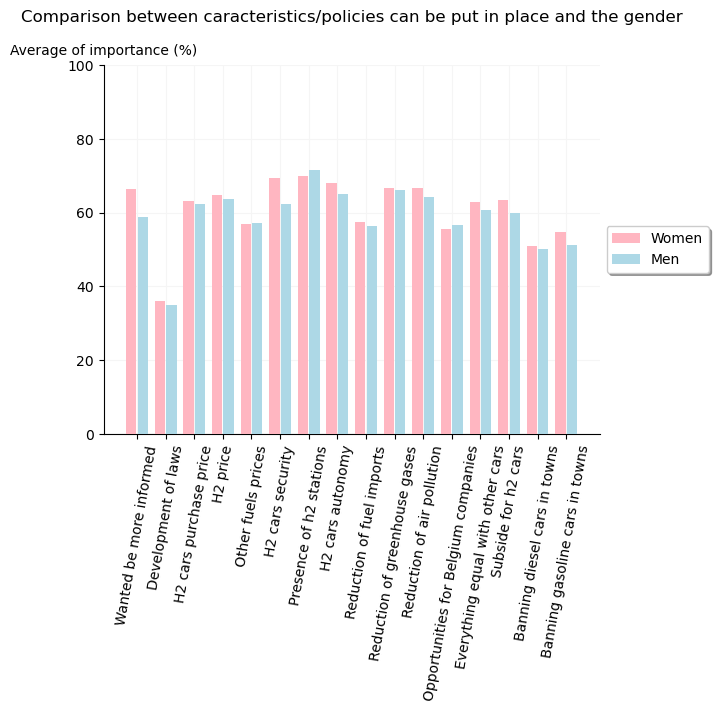

In [16]:
# Comparison depending of gender

sum_subject_know = 0
sum_law_elaboration = 0
sum_h2_purchasePrice = 0
sum_h2_price = 0
sum_otherfuel_price = 0
sum_h2_security = 0 
sum_h2_station = 0
sum_h2_automony = 0
sum_dimImportation = 0
sum_gazReduction = 0
sum_atmos_reduction_urban = 0
sum_Belgium_company = 0
sum_everything_equal = 0
sum_subside = 0
sum_diesel_no_in_town = 0
sum_essence_no_in_town = 0

sum_subject_know_1 = 0
sum_law_elaboration_1 = 0
sum_h2_purchasePrice_1 = 0
sum_h2_price_1 = 0
sum_otherfuel_price_1 = 0
sum_h2_security_1 = 0 
sum_h2_station_1 = 0
sum_h2_automony_1 = 0
sum_dimImportation_1 = 0
sum_gazReduction_1 = 0
sum_atmos_reduction_urban_1 = 0
sum_Belgium_company_1 = 0
sum_everything_equal_1 = 0
sum_subside_1 = 0
sum_diesel_no_in_town_1 = 0
sum_essence_no_in_town_1 = 0

sum_subject_know_2 = 0
sum_law_elaboration_2 = 0
sum_h2_purchasePrice_2 = 0
sum_h2_price_2 = 0
sum_otherfuel_price_2 = 0
sum_h2_security_2 = 0 
sum_h2_station_2 = 0
sum_h2_automony_2 = 0
sum_dimImportation_2 = 0
sum_gazReduction_2 = 0
sum_atmos_reduction_urban_2 = 0
sum_Belgium_company_2 = 0
sum_everything_equal_2 = 0
sum_subside_2 = 0
sum_diesel_no_in_town_2 = 0
sum_essence_no_in_town_2 = 0

av_subject_know = 0
av_law_elaboration = 0
av_h2_purchasePrice = 0
av_h2_price = 0
av_otherfuel_price = 0
av_h2_security = 0
av_h2_station = 0
av_h2_automony = 0
av_dimImportation = 0
av_gazReduction = 0
av_atmos_reduction_urban = 0
av_Belgium_company = 0
av_everything_equal = 0
av_subside = 0
av_diesel_no_in_town = 0
av_essence_no_in_town = 0

av_subject_know_1 = 0
av_law_elaboration_1 = 0
av_h2_purchasePrice_1 = 0
av_h2_price_1 = 0
av_otherfuel_price_1 = 0
av_h2_security_1 = 0 
av_h2_station_1 = 0
av_h2_automony_1 = 0
av_dimImportation_1 = 0
av_gazReduction_1 = 0
av_atmos_reduction_urban_1 = 0
av_Belgium_company_1 = 0
av_everything_equal_1 = 0
av_subside_1 = 0
av_diesel_no_in_town_1 = 0
av_essence_no_in_town_1 = 0

av_subject_know_2 = 0
av_law_elaboration_2 = 0
av_h2_purchasePrice_2 = 0
av_h2_price_2 = 0
av_otherfuel_price_2 = 0
av_h2_security_2 = 0 
av_h2_station_2 = 0
av_h2_automony_2 = 0
av_dimImportation_2 = 0
av_gazReduction_2 = 0
av_atmos_reduction_urban_2 = 0
av_Belgium_company_2 = 0
av_everything_equal_2 = 0
av_subside_2 = 0
av_diesel_no_in_town_2 = 0
av_essence_no_in_town_2 = 0


sum_cat = 0
sum_cat_1 = 0
sum_cat_2 = 0

for i in range(len_df):
        if df['sex'][i] == "Femme" : 
            sum_cat += 1
            sum_subject_know += df['subject_know'][i]
            sum_law_elaboration += df['law_elaboration'][i]
            sum_h2_purchasePrice += df['h2_purchasePrice'][i]
            sum_h2_price += df['h2_price'][i]
            sum_otherfuel_price += df['otherfuel_price'][i]
            sum_h2_security += df['h2_security'][i]
            sum_h2_station += df['h2_station'][i]
            sum_h2_automony += df['h2_automony'][i]
            sum_dimImportation += df['dimImportation'][i]
            sum_gazReduction += df['gazReduction'][i]
            sum_atmos_reduction_urban += df['atmos_reduction_urban'][i]
            sum_Belgium_company += df['Belgium_company'][i]

            sum_everything_equal += df['everything_equal'][i]
            sum_subside += df['subside'][i]
            sum_diesel_no_in_town += df['diesel_no_in_town'][i]
            sum_essence_no_in_town += df['essence_no_in_town'][i]

        else:
            sum_cat_1 += 1
            sum_subject_know_1 += df['subject_know'][i]
            sum_law_elaboration_1 += df['law_elaboration'][i]
            sum_h2_purchasePrice_1 += df['h2_purchasePrice'][i]
            sum_h2_price_1 += df['h2_price'][i]
            sum_otherfuel_price_1 += df['otherfuel_price'][i]
            sum_h2_security_1 += df['h2_security'][i]
            sum_h2_station_1 += df['h2_station'][i]
            sum_h2_automony_1 += df['h2_automony'][i]
            sum_dimImportation_1 += df['dimImportation'][i]
            sum_gazReduction_1 += df['gazReduction'][i]
            sum_atmos_reduction_urban_1 += df['atmos_reduction_urban'][i]
            sum_Belgium_company_1 += df['Belgium_company'][i]

            sum_everything_equal_1 += df['everything_equal'][i]
            sum_subside_1 += df['subside'][i]
            sum_diesel_no_in_town_1 += df['diesel_no_in_town'][i]
            sum_essence_no_in_town_1 += df['essence_no_in_town'][i]
 

# Average for each
if(sum_cat != 0) : 
    av_subject_know = (sum_subject_know/sum_cat)*20
    av_law_elaboration = (sum_law_elaboration/sum_cat)*20
    av_h2_purchasePrice = (sum_h2_purchasePrice/sum_cat)*20
    av_h2_price = (sum_h2_price/sum_cat)*20
    av_otherfuel_price = (sum_otherfuel_price/sum_cat)*20
    av_h2_security = (sum_h2_security/sum_cat)*20
    av_h2_station = (sum_h2_station/sum_cat)*20
    av_h2_automony = (sum_h2_automony/sum_cat)*20
    av_dimImportation = (sum_dimImportation/sum_cat)*20
    av_gazReduction = (sum_gazReduction/sum_cat)*20
    av_atmos_reduction_urban = (sum_atmos_reduction_urban/sum_cat)*20
    av_Belgium_company = (sum_Belgium_company/sum_cat)*20
    av_everything_equal = (sum_everything_equal/sum_cat)*20
    av_subside = (sum_subside/sum_cat)*20
    av_diesel_no_in_town = (sum_diesel_no_in_town/sum_cat)*20
    av_essence_no_in_town = (sum_essence_no_in_town/sum_cat)*20

# Average for each of category 1
if(sum_cat_1 != 0) : 
    av_subject_know_1 = (sum_subject_know_1/sum_cat_1)*20
    av_law_elaboration_1 = (sum_law_elaboration_1/sum_cat_1)*20
    av_h2_purchasePrice_1 = (sum_h2_purchasePrice_1/sum_cat_1)*20
    av_h2_price_1 = (sum_h2_price_1/sum_cat_1)*20
    av_otherfuel_price_1 = (sum_otherfuel_price_1/sum_cat_1)*20
    av_h2_security_1 = (sum_h2_security_1/sum_cat_1)*20
    av_h2_station_1 = (sum_h2_station_1/sum_cat_1)*20
    av_h2_automony_1 = (sum_h2_automony_1/sum_cat_1)*20
    av_dimImportation_1 = (sum_dimImportation_1/sum_cat_1)*20
    av_gazReduction_1 = (sum_gazReduction_1/sum_cat_1)*20
    av_atmos_reduction_urban_1 = (sum_atmos_reduction_urban_1/sum_cat_1)*20
    av_Belgium_company_1 = (sum_Belgium_company_1/sum_cat_1)*20
    av_everything_equal_1 = (sum_everything_equal_1/sum_cat_1)*20
    av_subside_1 = (sum_subside_1/sum_cat_1)*20
    av_diesel_no_in_town_1 = (sum_diesel_no_in_town_1/sum_cat_1)*20
    av_essence_no_in_town_1 = (sum_essence_no_in_town_1/sum_cat_1)*20


if(sum_cat_2 != 0):
    av_subject_know_2 = (sum_subject_know_2/sum_cat_2)*20
    av_law_elaboration_2 = (sum_law_elaboration_2/sum_cat_2)*20
    av_h2_purchasePrice_2 = (sum_h2_purchasePrice_2/sum_cat_2)*20
    av_h2_price_2 = (sum_h2_price_2/sum_cat_2)*20
    av_otherfuel_price_2 = (sum_otherfuel_price_2/sum_cat_2)*20
    av_h2_security_2 = (sum_h2_security_2/sum_cat_2)*20
    av_h2_station_2 = (sum_h2_station_2/sum_cat_2)*20
    av_h2_automony_2 = (sum_h2_automony_2/sum_cat_2)*20
    av_dimImportation_2 = (sum_dimImportation_2/sum_cat_2)*20
    av_gazReduction_2 = (sum_gazReduction_2/sum_cat_2)*20
    av_atmos_reduction_urban_2 = (sum_atmos_reduction_urban_2/sum_cat_2)*20
    av_Belgium_company_2 = (sum_Belgium_company_2/sum_cat_2)*20
    av_everything_equal_2 = (sum_everything_equal_2/sum_cat_2)*20
    av_subside_2 = (sum_subside_2/sum_cat_2)*20
    av_diesel_no_in_town_2 = (sum_diesel_no_in_town_2/sum_cat_2)*20
    av_essence_no_in_town_2 = (sum_essence_no_in_town_2/sum_cat_2)*20


data = {
    "Women": [av_subject_know, av_law_elaboration, av_h2_purchasePrice, av_h2_price, av_otherfuel_price,
 av_h2_security, av_h2_station,av_h2_automony,av_dimImportation,av_gazReduction,
 av_atmos_reduction_urban,av_Belgium_company, av_everything_equal, av_subside,
 av_diesel_no_in_town,av_essence_no_in_town],
    "Men": [av_subject_know_1, av_law_elaboration_1, av_h2_purchasePrice_1, av_h2_price_1, av_otherfuel_price_1,
 av_h2_security_1, av_h2_station_1,av_h2_automony_1,av_dimImportation_1,av_gazReduction_1,
 av_atmos_reduction_urban_1,av_Belgium_company_1, av_everything_equal_1, av_subside_1,
 av_diesel_no_in_town_1,av_essence_no_in_town_1 ]
}


fig, ax = plt.subplots()
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.ylim(0, 100)
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xticks(range(16), ['Wanted be more informed', 'Development of laws', 'H2 cars purchase price','H2 price', 'Other fuels prices',
 'H2 cars security', 'Presence of h2 stations','H2 cars autonomy','Reduction of fuel imports','Reduction of greenhouse gases',
 'Reduction of air pollution','Opportunities for Belgium companies', 'Everything equal with other cars', 'Subside for h2 cars',
 'Banning diesel cars in towns','Banning gasoline cars in towns'], rotation='vertical')

plt.title("Comparison between caracteristics/policies can be put in place and the gender\n \n")

plt.ylabel('Average of importance (in %)', rotation=0)
plt.ylabel('Average of importance (%)', rotation=0)
ax.yaxis.set_label_coords(0,1.02)
degrees = 80
plt.xticks(rotation=degrees)
ax.grid(zorder=0, color="whitesmoke")

plt.show()

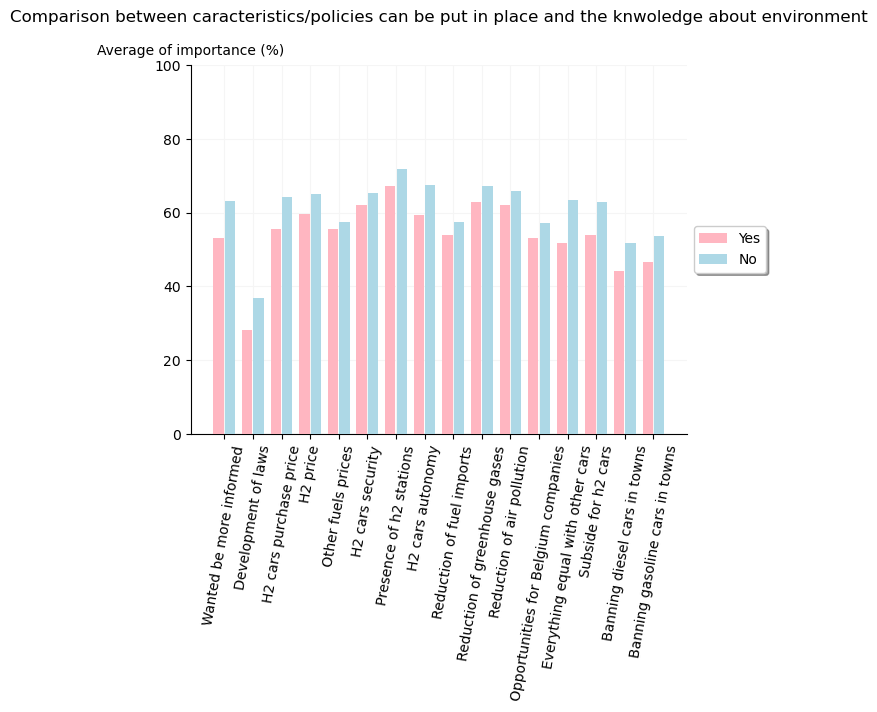

In [17]:
# Comparison depending of place of residence

sum_subject_know = 0
sum_law_elaboration = 0
sum_h2_purchasePrice = 0
sum_h2_price = 0
sum_otherfuel_price = 0
sum_h2_security = 0 
sum_h2_station = 0
sum_h2_automony = 0
sum_dimImportation = 0
sum_gazReduction = 0
sum_atmos_reduction_urban = 0
sum_Belgium_company = 0
sum_everything_equal = 0
sum_subside = 0
sum_diesel_no_in_town = 0
sum_essence_no_in_town = 0

sum_subject_know_1 = 0
sum_law_elaboration_1 = 0
sum_h2_purchasePrice_1 = 0
sum_h2_price_1 = 0
sum_otherfuel_price_1 = 0
sum_h2_security_1 = 0 
sum_h2_station_1 = 0
sum_h2_automony_1 = 0
sum_dimImportation_1 = 0
sum_gazReduction_1 = 0
sum_atmos_reduction_urban_1 = 0
sum_Belgium_company_1 = 0
sum_everything_equal_1 = 0
sum_subside_1 = 0
sum_diesel_no_in_town_1 = 0
sum_essence_no_in_town_1 = 0

sum_subject_know_2 = 0
sum_law_elaboration_2 = 0
sum_h2_purchasePrice_2 = 0
sum_h2_price_2 = 0
sum_otherfuel_price_2 = 0
sum_h2_security_2 = 0 
sum_h2_station_2 = 0
sum_h2_automony_2 = 0
sum_dimImportation_2 = 0
sum_gazReduction_2 = 0
sum_atmos_reduction_urban_2 = 0
sum_Belgium_company_2 = 0
sum_everything_equal_2 = 0
sum_subside_2 = 0
sum_diesel_no_in_town_2 = 0
sum_essence_no_in_town_2 = 0

av_subject_know = 0
av_law_elaboration = 0
av_h2_purchasePrice = 0
av_h2_price = 0
av_otherfuel_price = 0
av_h2_security = 0
av_h2_station = 0
av_h2_automony = 0
av_dimImportation = 0
av_gazReduction = 0
av_atmos_reduction_urban = 0
av_Belgium_company = 0
av_everything_equal = 0
av_subside = 0
av_diesel_no_in_town = 0
av_essence_no_in_town = 0

av_subject_know_1 = 0
av_law_elaboration_1 = 0
av_h2_purchasePrice_1 = 0
av_h2_price_1 = 0
av_otherfuel_price_1 = 0
av_h2_security_1 = 0 
av_h2_station_1 = 0
av_h2_automony_1 = 0
av_dimImportation_1 = 0
av_gazReduction_1 = 0
av_atmos_reduction_urban_1 = 0
av_Belgium_company_1 = 0
av_everything_equal_1 = 0
av_subside_1 = 0
av_diesel_no_in_town_1 = 0
av_essence_no_in_town_1 = 0

av_subject_know_2 = 0
av_law_elaboration_2 = 0
av_h2_purchasePrice_2 = 0
av_h2_price_2 = 0
av_otherfuel_price_2 = 0
av_h2_security_2 = 0 
av_h2_station_2 = 0
av_h2_automony_2 = 0
av_dimImportation_2 = 0
av_gazReduction_2 = 0
av_atmos_reduction_urban_2 = 0
av_Belgium_company_2 = 0
av_everything_equal_2 = 0
av_subside_2 = 0
av_diesel_no_in_town_2 = 0
av_essence_no_in_town_2 = 0


sum_cat = 0
sum_cat_1 = 0
sum_cat_2 = 0

for i in range(len_df):
        if df['environment_Know'][i] == "Oui" : 
            sum_cat += 1
            sum_subject_know += df['subject_know'][i]
            sum_law_elaboration += df['law_elaboration'][i]
            sum_h2_purchasePrice += df['h2_purchasePrice'][i]
            sum_h2_price += df['h2_price'][i]
            sum_otherfuel_price += df['otherfuel_price'][i]
            sum_h2_security += df['h2_security'][i]
            sum_h2_station += df['h2_station'][i]
            sum_h2_automony += df['h2_automony'][i]
            sum_dimImportation += df['dimImportation'][i]
            sum_gazReduction += df['gazReduction'][i]
            sum_atmos_reduction_urban += df['atmos_reduction_urban'][i]
            sum_Belgium_company += df['Belgium_company'][i]

            sum_everything_equal += df['everything_equal'][i]
            sum_subside += df['subside'][i]
            sum_diesel_no_in_town += df['diesel_no_in_town'][i]
            sum_essence_no_in_town += df['essence_no_in_town'][i]

        else:
            sum_cat_1 += 1
            sum_subject_know_1 += df['subject_know'][i]
            sum_law_elaboration_1 += df['law_elaboration'][i]
            sum_h2_purchasePrice_1 += df['h2_purchasePrice'][i]
            sum_h2_price_1 += df['h2_price'][i]
            sum_otherfuel_price_1 += df['otherfuel_price'][i]
            sum_h2_security_1 += df['h2_security'][i]
            sum_h2_station_1 += df['h2_station'][i]
            sum_h2_automony_1 += df['h2_automony'][i]
            sum_dimImportation_1 += df['dimImportation'][i]
            sum_gazReduction_1 += df['gazReduction'][i]
            sum_atmos_reduction_urban_1 += df['atmos_reduction_urban'][i]
            sum_Belgium_company_1 += df['Belgium_company'][i]

            sum_everything_equal_1 += df['everything_equal'][i]
            sum_subside_1 += df['subside'][i]
            sum_diesel_no_in_town_1 += df['diesel_no_in_town'][i]
            sum_essence_no_in_town_1 += df['essence_no_in_town'][i]
 


    

# Average for each
if(sum_cat != 0) : 
    av_subject_know = (sum_subject_know/sum_cat)*20
    av_law_elaboration = (sum_law_elaboration/sum_cat)*20
    av_h2_purchasePrice = (sum_h2_purchasePrice/sum_cat)*20
    av_h2_price = (sum_h2_price/sum_cat)*20
    av_otherfuel_price = (sum_otherfuel_price/sum_cat)*20
    av_h2_security = (sum_h2_security/sum_cat)*20
    av_h2_station = (sum_h2_station/sum_cat)*20
    av_h2_automony = (sum_h2_automony/sum_cat)*20
    av_dimImportation = (sum_dimImportation/sum_cat)*20
    av_gazReduction = (sum_gazReduction/sum_cat)*20
    av_atmos_reduction_urban = (sum_atmos_reduction_urban/sum_cat)*20
    av_Belgium_company = (sum_Belgium_company/sum_cat)*20
    av_everything_equal = (sum_everything_equal/sum_cat)*20
    av_subside = (sum_subside/sum_cat)*20
    av_diesel_no_in_town = (sum_diesel_no_in_town/sum_cat)*20
    av_essence_no_in_town = (sum_essence_no_in_town/sum_cat)*20

# Average for each of category 1
if(sum_cat_1 != 0) : 
    av_subject_know_1 = (sum_subject_know_1/sum_cat_1)*20
    av_law_elaboration_1 = (sum_law_elaboration_1/sum_cat_1)*20
    av_h2_purchasePrice_1 = (sum_h2_purchasePrice_1/sum_cat_1)*20
    av_h2_price_1 = (sum_h2_price_1/sum_cat_1)*20
    av_otherfuel_price_1 = (sum_otherfuel_price_1/sum_cat_1)*20
    av_h2_security_1 = (sum_h2_security_1/sum_cat_1)*20
    av_h2_station_1 = (sum_h2_station_1/sum_cat_1)*20
    av_h2_automony_1 = (sum_h2_automony_1/sum_cat_1)*20
    av_dimImportation_1 = (sum_dimImportation_1/sum_cat_1)*20
    av_gazReduction_1 = (sum_gazReduction_1/sum_cat_1)*20
    av_atmos_reduction_urban_1 = (sum_atmos_reduction_urban_1/sum_cat_1)*20
    av_Belgium_company_1 = (sum_Belgium_company_1/sum_cat_1)*20
    av_everything_equal_1 = (sum_everything_equal_1/sum_cat_1)*20
    av_subside_1 = (sum_subside_1/sum_cat_1)*20
    av_diesel_no_in_town_1 = (sum_diesel_no_in_town_1/sum_cat_1)*20
    av_essence_no_in_town_1 = (sum_essence_no_in_town_1/sum_cat_1)*20


if(sum_cat_2 != 0):
    av_subject_know_2 = (sum_subject_know_2/sum_cat_2)*20
    av_law_elaboration_2 = (sum_law_elaboration_2/sum_cat_2)*20
    av_h2_purchasePrice_2 = (sum_h2_purchasePrice_2/sum_cat_2)*20
    av_h2_price_2 = (sum_h2_price_2/sum_cat_2)*20
    av_otherfuel_price_2 = (sum_otherfuel_price_2/sum_cat_2)*20
    av_h2_security_2 = (sum_h2_security_2/sum_cat_2)*20
    av_h2_station_2 = (sum_h2_station_2/sum_cat_2)*20
    av_h2_automony_2 = (sum_h2_automony_2/sum_cat_2)*20
    av_dimImportation_2 = (sum_dimImportation_2/sum_cat_2)*20
    av_gazReduction_2 = (sum_gazReduction_2/sum_cat_2)*20
    av_atmos_reduction_urban_2 = (sum_atmos_reduction_urban_2/sum_cat_2)*20
    av_Belgium_company_2 = (sum_Belgium_company_2/sum_cat_2)*20
    av_everything_equal_2 = (sum_everything_equal_2/sum_cat_2)*20
    av_subside_2 = (sum_subside_2/sum_cat_2)*20
    av_diesel_no_in_town_2 = (sum_diesel_no_in_town_2/sum_cat_2)*20
    av_essence_no_in_town_2 = (sum_essence_no_in_town_2/sum_cat_2)*20


data = {
    "Yes": [av_subject_know, av_law_elaboration, av_h2_purchasePrice, av_h2_price, av_otherfuel_price,
 av_h2_security, av_h2_station,av_h2_automony,av_dimImportation,av_gazReduction,
 av_atmos_reduction_urban,av_Belgium_company, av_everything_equal, av_subside,
 av_diesel_no_in_town,av_essence_no_in_town],
    "No": [av_subject_know_1, av_law_elaboration_1, av_h2_purchasePrice_1, av_h2_price_1, av_otherfuel_price_1,
 av_h2_security_1, av_h2_station_1,av_h2_automony_1,av_dimImportation_1,av_gazReduction_1,
 av_atmos_reduction_urban_1,av_Belgium_company_1, av_everything_equal_1, av_subside_1,
 av_diesel_no_in_town_1,av_essence_no_in_town_1 ]
}

fig, ax = plt.subplots()
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.ylim(0, 100)
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xticks(range(16), ['Wanted be more informed', 'Development of laws', 'H2 cars purchase price','H2 price', 'Other fuels prices',
 'H2 cars security', 'Presence of h2 stations','H2 cars autonomy','Reduction of fuel imports','Reduction of greenhouse gases',
 'Reduction of air pollution','Opportunities for Belgium companies', 'Everything equal with other cars', 'Subside for h2 cars',
 'Banning diesel cars in towns','Banning gasoline cars in towns'], rotation='vertical')

plt.title("Comparison between caracteristics/policies can be put in place and the knwoledge about environment\n\n")

plt.ylabel('Average of importance (%)', rotation=0)
ax.yaxis.set_label_coords(0,1.02)
degrees = 80
plt.xticks(rotation=degrees)
ax.grid(zorder=0, color="whitesmoke")

plt.show()